In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
dataset_trening=pd.read_csv('cookies_train.csv', header=0)
dataset_test = pd.read_csv('cookies_test.csv', header=0)
print(dataset_trening.shape)
print(dataset_test.shape)
#dataset_trening.head(1200)
dataset_test.head(1200)


(1738, 134)
(193, 134)


Italian seasoning  Worcestershire sauce  allspice  almonds  anchovies  \
0                    0                     0         0        0          0   
1                    0                     0         0        0          0   
2                    0                     0         0        0          0   
3                    0                     0         0        0          0   
4                    0                     0         0        1          0   
..                 ...                   ...       ...      ...        ...   
188                  0                     0         0        0          0   
189                  0                     0         0        0          0   
190                  0                     0         0        0          0   
191                  0                     0         0        0          0   
192                  0                     0         0        0          0   

     anise  apples  apricots  arugula  bacon  ...  vanilla  vinegar  \
0        0       0         0        0      0  ...        1        0   
1        0       0         0        0      0  ...        1        0   
2        0       0         0        0      0  ...        1        0   
3        0       0         0        0      0  ...        0        0   
4        0       0         0        0      0  ...        1        0   
..     ...     ...       ...      ...    ...  ...      ...      ...   
188      0       0         0        0      0  ...        0        0   
189      0       0         0        0      0  ...        0        0   
190      0       0         0        0      0  ...        0        0   
191      0       0         0        0      1  ...        0        0   
192      0       0         0        0      0  ...        0        0   

     wafer cookies  walnuts  water  whipping cream  wine  yeast  zucchini  \
0                0        0      0               0     0      0         0   
1                0        0      0               0     0      0         0   
2                0        0      0               0     0      0         0   
3                0        1      0               0     0      0         0   
4                0        0      1               0     0      0         0   
..             ...      ...    ...             ...   ...    ...       ...   
188              0        0      1               0     0      1         0   
189              0        0      0               0     0      0         0   
190              0        0      0               0     0      0         0   
191              0        0      0               0     0      0         0   
192              0        0      0               0     0      0         0   

       class  
0    Cookies  
1    Cookies  
2    Cookies  
3    Cookies  
4    Cookies  
..       ...  
188   Pizzas  
189   Pizzas  
190   Pizzas  
191   Pizzas  
192   Pizzas  

[193 rows x 134 columns]

In [3]:
X_trening = dataset_trening.iloc[:, :-1]
y_trening = dataset_trening.iloc[:, -1]
labels_y = y_trening.unique()
X_test=dataset_test.iloc[:, :-1]
y_test = dataset_test.iloc[:, -1]
print(labels_y)

['Cookies' 'Pastries' 'Pizzas']


In [4]:
print('nedostajućih vrednostiima: ', X_trening.isnull().sum().sum())
print('oznake klasa su: ', y_trening.unique())
print('uzoraka u prvoj klasi ima: ', sum(y_trening=='Cookies'))
print('uzoraka u drugoj klasi ima: ', sum(y_trening=='Pastries'))
print('uzoraka u trecoj klasi ima: ', sum(y_trening=='Pizzas'))

nedostajućih vrednostiima:  0
oznake klasa su:  ['Cookies' 'Pastries' 'Pizzas']
uzoraka u prvoj klasi ima:  723
uzoraka u drugoj klasi ima:  619
uzoraka u trecoj klasi ima:  396


In [5]:

dataset_trening_cookies = dataset_trening[dataset_trening["class"].isin(['Cookies'])]
print(dataset_trening_cookies.shape)
dataset_trening_cookies.head()

(723, 134)


Italian seasoning  Worcestershire sauce  allspice  almonds  anchovies  \
0                  0                     0         1        0          0   
1                  0                     0         0        0          0   
2                  0                     0         0        0          0   
3                  0                     0         0        1          0   
4                  0                     0         0        0          0   

   anise  apples  apricots  arugula  bacon  ...  vanilla  vinegar  \
0      0       0         0        0      0  ...        0        0   
1      0       0         0        0      0  ...        1        0   
2      0       0         0        0      0  ...        1        0   
3      0       0         0        0      0  ...        0        0   
4      0       0         0        0      0  ...        1        0   

   wafer cookies  walnuts  water  whipping cream  wine  yeast  zucchini  \
0              0        0      0               0     0      0         0   
1              0        0      0               0     0      0         0   
2              0        0      1               0     0      0         0   
3              0        0      0               0     0      0         0   
4              0        0      0               0     0      0         0   

     class  
0  Cookies  
1  Cookies  
2  Cookies  
3  Cookies  
4  Cookies  

[5 rows x 134 columns]

In [6]:

m0=dataset_trening_cookies.drop(['class'],inplace=True,axis=1)

m0=dataset_trening_cookies.sum(axis=0)
print(m0)



Italian seasoning        0
Worcestershire sauce     0
allspice                23
almonds                 97
anchovies                0
                        ..
water                   58
whipping cream           8
wine                     0
yeast                    0
zucchini                 0
Length: 133, dtype: int64


F:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:

m00=m0/len(dataset_trening_cookies)
print(m00)


Italian seasoning       0.000000
Worcestershire sauce    0.000000
allspice                0.031812
almonds                 0.134163
anchovies               0.000000
                          ...   
water                   0.080221
whipping cream          0.011065
wine                    0.000000
yeast                   0.000000
zucchini                0.000000
Length: 133, dtype: float64


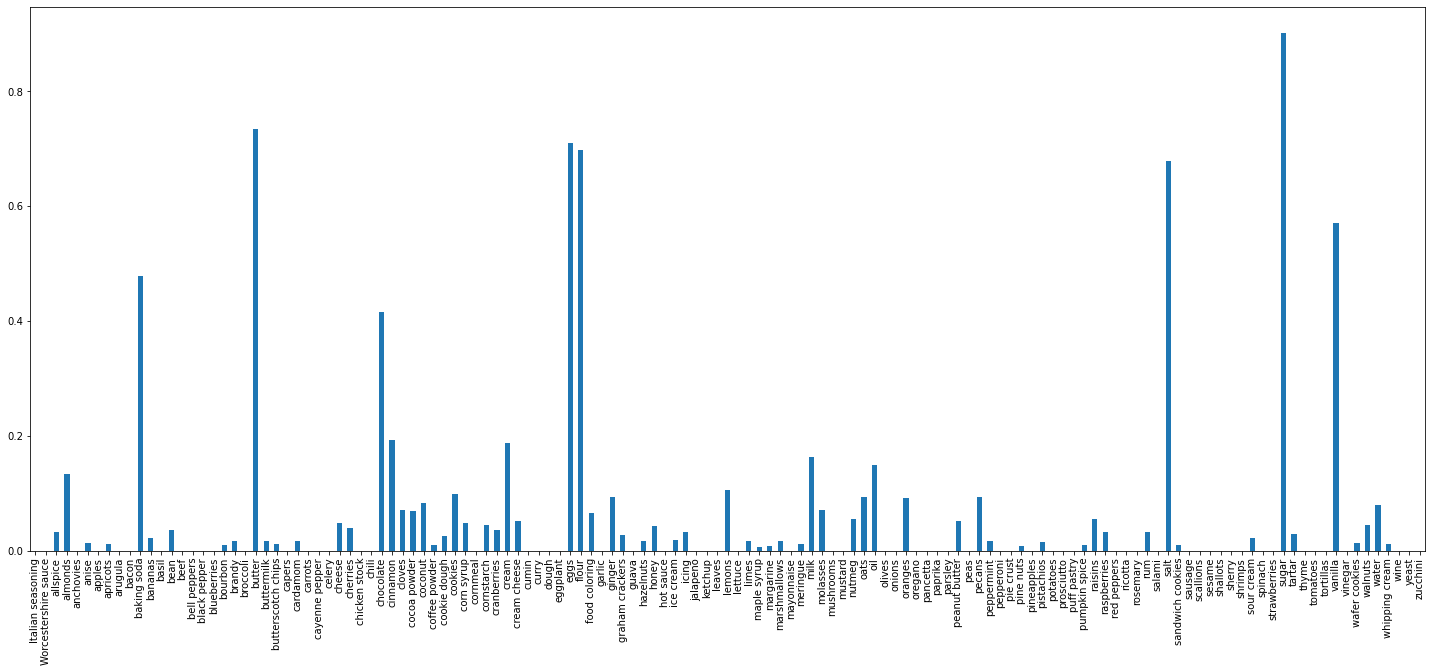

In [8]:
plt.figure(figsize=(25,10))
m00.plot.bar()

In [9]:
dataset_trening_pastries = dataset_trening[dataset_trening["class"].isin(['Pastries'])]
print(dataset_trening_pastries.shape)
dataset_trening_pastries.head()
m1=dataset_trening_pastries.drop(['class'],inplace=True,axis=1)
m1=dataset_trening_pastries.sum(axis=0)
print(m1)

(619, 134)
Italian seasoning         0
Worcestershire sauce      0
allspice                 21
almonds                  45
anchovies                 0
                       ... 
water                   178
whipping cream            0
wine                     24
yeast                    28
zucchini                  0
Length: 133, dtype: int64


F:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:

m11=m1/len(dataset_trening_pastries)
print(m11)

Italian seasoning       0.000000
Worcestershire sauce    0.000000
allspice                0.033926
almonds                 0.072698
anchovies               0.000000
                          ...   
water                   0.287561
whipping cream          0.000000
wine                    0.038772
yeast                   0.045234
zucchini                0.000000
Length: 133, dtype: float64


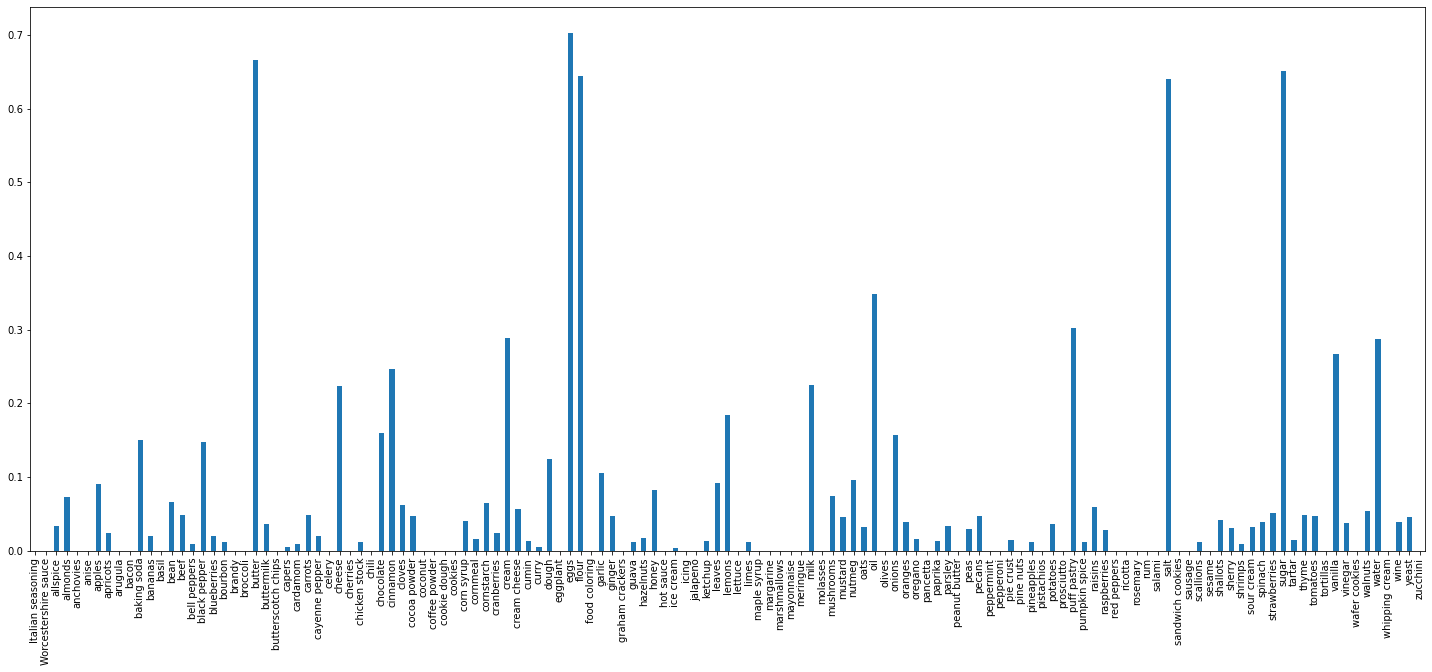

In [11]:
plt.figure(figsize=(25,10))
m11.plot.bar()

In [12]:
dataset_trening_pizzas = dataset_trening[dataset_trening["class"].isin(['Pizzas'])]
print(dataset_trening_pizzas.shape)
dataset_trening_pizzas.head()
m2=dataset_trening_pizzas.drop(['class'],inplace=True,axis=1)
m2=dataset_trening_pizzas.sum(axis=0)
print(m2)

(396, 134)
Italian seasoning        23
Worcestershire sauce     10
allspice                  0
almonds                   0
anchovies                 8
                       ... 
water                   139
whipping cream            0
wine                     24
yeast                   147
zucchini                 12
Length: 133, dtype: int64


F:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:

m22=m2/len(dataset_trening)
print(m22)

Italian seasoning       0.013234
Worcestershire sauce    0.005754
allspice                0.000000
almonds                 0.000000
anchovies               0.004603
                          ...   
water                   0.079977
whipping cream          0.000000
wine                    0.013809
yeast                   0.084580
zucchini                0.006904
Length: 133, dtype: float64


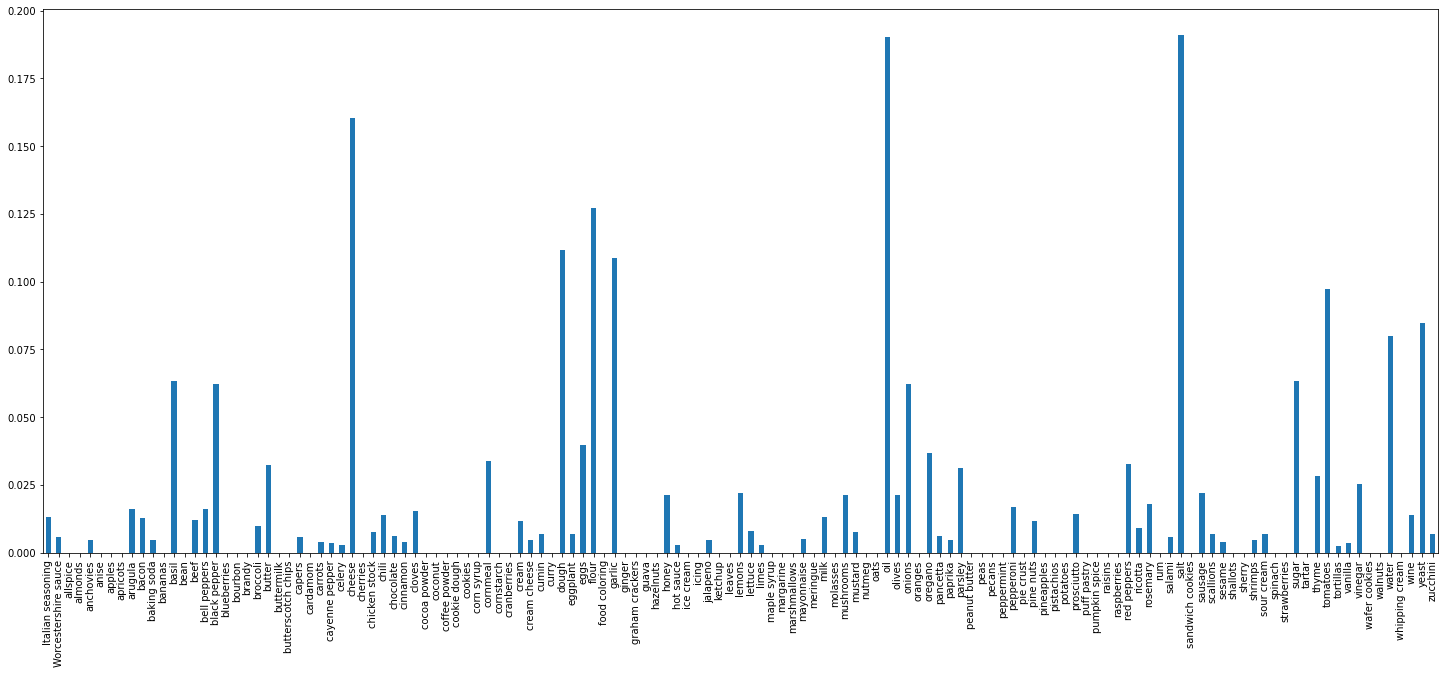

In [14]:
plt.figure(figsize=(25,10))
m22.plot.bar()

In [15]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1, 5, 7, 15, 23 ]:
    for m in ['jaccard','dice']:
        indexes = kf.split(X_trening, y_trening)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_trening)),len(np.unique(y_trening))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X_trening.iloc[train_index,:], y_trening.iloc[train_index])
            y_pred = classifier.predict(X_trening.iloc[test_index,:])
            acc_tmp.append(accuracy_score(y_trening.iloc[test_index], y_pred))
            fin_conf_mat += confusion_matrix(y_trening.iloc[test_index], y_pred, labels=labels_y)
        print('za parametre k=', k, ' i m=', m, ' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        print(fin_conf_mat)
        acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

za parametre k= 1  i m= jaccard  tacnost je:  0.9016211547405488  a mat. konf. je:
[[664.  56.   3.]
 [ 59. 543.  17.]
 [ 10.  26. 360.]]
za parametre k= 1  i m= dice  tacnost je:  0.9016211547405488  a mat. konf. je:
[[664.  56.   3.]
 [ 59. 543.  17.]
 [ 10.  26. 360.]]
za parametre k= 5  i m= jaccard  tacnost je:  0.8670918875822204  a mat. konf. je:
[[668.  55.   0.]
 [129. 476.  14.]
 [  8.  25. 363.]]
za parametre k= 5  i m= dice  tacnost je:  0.8670918875822204  a mat. konf. je:
[[668.  55.   0.]
 [129. 476.  14.]
 [  8.  25. 363.]]
za parametre k= 7  i m= jaccard  tacnost je:  0.8521327486545743  a mat. konf. je:
[[672.  51.   0.]
 [158. 446.  15.]
 [  8.  25. 363.]]
za parametre k= 7  i m= dice  tacnost je:  0.8521327486545743  a mat. konf. je:
[[672.  51.   0.]
 [158. 446.  15.]
 [  8.  25. 363.]]
za parametre k= 15  i m= jaccard  tacnost je:  0.8515646800877018  a mat. konf. je:
[[682.  40.   1.]
 [163. 430.  26.]
 [  8.  20. 368.]]
za parametre k= 15  i m= dice  tacnost je:

In [19]:
def evaluation_classif_cookies(conf_mat):
    TP = conf_mat[0,0]
    FP = conf_mat[1,0]+conf_mat[2,0]
    FN = conf_mat[0,1]+conf_mat[0,2]
    TN = conf_mat[1,1]+conf_mat[1,2]+conf_mat[2,1]+conf_mat[2,2]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    #F_score = 2*precision*sensitivity/(precision+sensitivity)
    
    print('Tačnost klasifikatora za klasu Cookies: ', accuracy)
    print('precision: ', precision)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    #print('F score: ', F_score)
    return accuracy
    return precision
    return sensitivity
    return specificity
    #return F_score

In [16]:
def evaluation_classif_pastries(conf_mat):
    TP = conf_mat[1,1]
    FP = conf_mat[0,1]+conf_mat[2,1]
    FN = conf_mat[1,0]+conf_mat[1,2]
    TN = conf_mat[0,0]+conf_mat[0,2]+conf_mat[2,0]+conf_mat[2,2]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    #F_score = 2*precision*sensitivity/(precision+sensitivity)
    
    print('Tačnost klasifikatora za klasu Pastries: ', accuracy)
    print('precision: ', precision)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    #print('F score: ', F_score)
    return accuracy
    return precision
    return sensitivity
    return specificity
    #return F_score

In [17]:
def evaluation_classif_pizzas(conf_mat):
    TP = conf_mat[2,2]
    FP = conf_mat[0,2]+conf_mat[1,2]
    FN = conf_mat[2,0]+conf_mat[2,1]
    TN = conf_mat[0,0]+conf_mat[0,1]+conf_mat[1,0]+conf_mat[1,1]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    #F_score = 2*precision*sensitivity/(precision+sensitivity)
    
    print('Tačnost klasifikatora za klasu Pizzas: ', accuracy)
    print('precision: ', precision)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    # print('F score: ', F_score)
    return accuracy
    return precision
    return sensitivity
    return specificity
    #return F_score


In [20]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(X_trening, y_trening)
fin_conf_mat = np.zeros((len(np.unique(y_trening)),len(np.unique(y_trening))))
for train_index, test_index in indexes:
    X_train = X_trening.iloc[train_index,:]
    X_test = X_trening.iloc[test_index,:]
    y_train = y_trening.iloc[train_index]
    y_test = y_trening.iloc[test_index]
    
    
    classifier = KNeighborsClassifier(n_neighbors=1, metric='jaccard')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    print(conf_mat)
    print(accuracy_score(y_test, y_pred))
    fin_conf_mat += conf_mat
    

print('finalna matrica je: ')
print(fin_conf_mat)
c=evaluation_classif_cookies(fin_conf_mat)
p1=evaluation_classif_pastries(fin_conf_mat)
p2=evaluation_classif_pizzas(fin_conf_mat)

print('prosecna tacnost klasifikatora',(c+p1+p2)/3)

[[67  6  0]
 [ 4 57  1]
 [ 2  3 34]]
0.9080459770114943
[[67  5  1]
 [ 6 56  0]
 [ 0  0 39]]
0.9310344827586207
[[69  4  0]
 [ 8 50  3]
 [ 0  5 35]]
0.8850574712643678
[[69  3  0]
 [ 8 51  3]
 [ 2  0 38]]
0.9080459770114943
[[62 10  0]
 [ 9 52  1]
 [ 0  1 39]]
0.8793103448275862
[[64  8  0]
 [ 2 57  3]
 [ 2  5 33]]
0.8850574712643678
[[67  4  1]
 [ 6 56  0]
 [ 2  5 33]]
0.896551724137931
[[64  7  1]
 [ 5 56  1]
 [ 1  2 37]]
0.9022988505747126
[[65  7  0]
 [ 7 55  0]
 [ 0  3 36]]
0.9017341040462428
[[70  2  0]
 [ 4 53  5]
 [ 1  2 36]]
0.9190751445086706
finalna matrica je: 
[[664.  56.   3.]
 [ 59. 543.  17.]
 [ 10.  26. 360.]]
Tačnost klasifikatora za klasu Cookies:  0.9263521288837745
precision:  0.9058663028649386
sensitivity/recall:  0.9183955739972337
specificity:  0.9320197044334976
Tačnost klasifikatora za klasu Pastries:  0.9090909090909091
precision:  0.8688
sensitivity/recall:  0.877221324717286
specificity:  0.9267202859696158
Tačnost klasifikatora za klasu Pizzas:  0.9677790

In [21]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='jaccard')
classifier.fit(X_trening, y_trening)
y_pred = classifier.predict(dataset_test.iloc[:,:-1])
conf_mat = confusion_matrix(dataset_test.iloc[:,-1], y_pred, labels=labels_y)
print(conf_mat)
print('procenat pogodjenih uzoraka: ', accuracy_score(dataset_test.iloc[:,-1], y_pred))
print('preciznost mikro: ', precision_score(dataset_test.iloc[:,-1], y_pred, average='micro'))
print('preciznost makro: ', precision_score(dataset_test.iloc[:,-1], y_pred, average='macro'))
#print('osetljivost mikro: ', recall_score(dataset_test.iloc[:,-1], y_pred, average='micro'))
#print('osetljivost makro: ', recall_score(dataset_test.iloc[:,-1], y_pred, average='macro'))
print('f mera mikro: ', f1_score(dataset_test.iloc[:,-1], y_pred, average='micro'))
print('f mera makro: ', f1_score(dataset_test.iloc[:,-1], y_pred, average='macro'))
print(labels_y)

c=evaluation_classif_cookies(conf_mat)
p1=evaluation_classif_pastries(conf_mat)
p2=evaluation_classif_pizzas(conf_mat)
print('prosecna tacnost klasifikatora',(c+p1+p2)/3)

[[76  3  1]
 [ 6 62  1]
 [ 2  4 38]]
procenat pogodjenih uzoraka:  0.9119170984455959
preciznost mikro:  0.9119170984455959
preciznost makro:  0.9177708764665287
f mera mikro:  0.9119170984455959
f mera makro:  0.9100472992307562
['Cookies' 'Pastries' 'Pizzas']
Tačnost klasifikatora za klasu Cookies:  0.9378238341968912
precision:  0.9047619047619048
sensitivity/recall:  0.95
specificity:  0.9292035398230089
Tačnost klasifikatora za klasu Pastries:  0.927461139896373
precision:  0.8985507246376812
sensitivity/recall:  0.8985507246376812
specificity:  0.9435483870967742
Tačnost klasifikatora za klasu Pizzas:  0.9585492227979274
precision:  0.95
sensitivity/recall:  0.8636363636363636
specificity:  0.9865771812080537
prosecna tacnost klasifikatora 0.9412780656303972


In [ ]:
#STABLO ODLUKE i RANDOM FOREST

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 15,20], 'class_weight':(None, 'balanced')}
dt = DecisionTreeClassifier()
clf=GridSearchCV(dt, parameters,cv=10)
clf.fit(X_trening, y_trening)
print(clf.best_score_)
print(clf.best_params_)

0.8503920005315262
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20}


[[65  6  2]
 [ 5 57  0]
 [ 1  3 35]]
[[66  6  1]
 [ 8 50  4]
 [ 0  1 38]]
[[68  5  0]
 [ 9 49  3]
 [ 0  5 35]]
[[68  4  0]
 [11 47  4]
 [ 2  2 36]]
[[67  5  0]
 [11 49  2]
 [ 0  1 39]]
[[65  6  1]
 [ 7 51  4]
 [ 1  3 36]]
[[61 10  1]
 [ 5 55  2]
 [ 5  2 33]]
[[64  8  0]
 [ 7 53  2]
 [ 0  1 39]]
[[65  7  0]
 [ 9 53  0]
 [ 0  2 37]]
[[63  8  1]
 [ 7 55  0]
 [ 1  3 35]]
finalna matrica za stablo odluke je: 
[[652.  65.   6.]
 [ 79. 519.  21.]
 [ 10.  23. 363.]]
procenat pogođenih uzoraka je:  88.26237054085155 %
Tačnost klasifikatora za klasu Cookies:  0.9079401611047181
precision:  0.8798920377867746
sensitivity/recall:  0.9017980636237898
specificity:  0.9123152709359605
Tačnost klasifikatora za klasu Pastries:  0.8918296892980437
precision:  0.8550247116968699
sensitivity/recall:  0.8384491114701131
specificity:  0.9213583556747096
Tačnost klasifikatora za klasu Pizzas:  0.9654775604142692
precision:  0.9307692307692308
sensitivity/recall:  0.9166666666666666
specificity:  0.9798807749

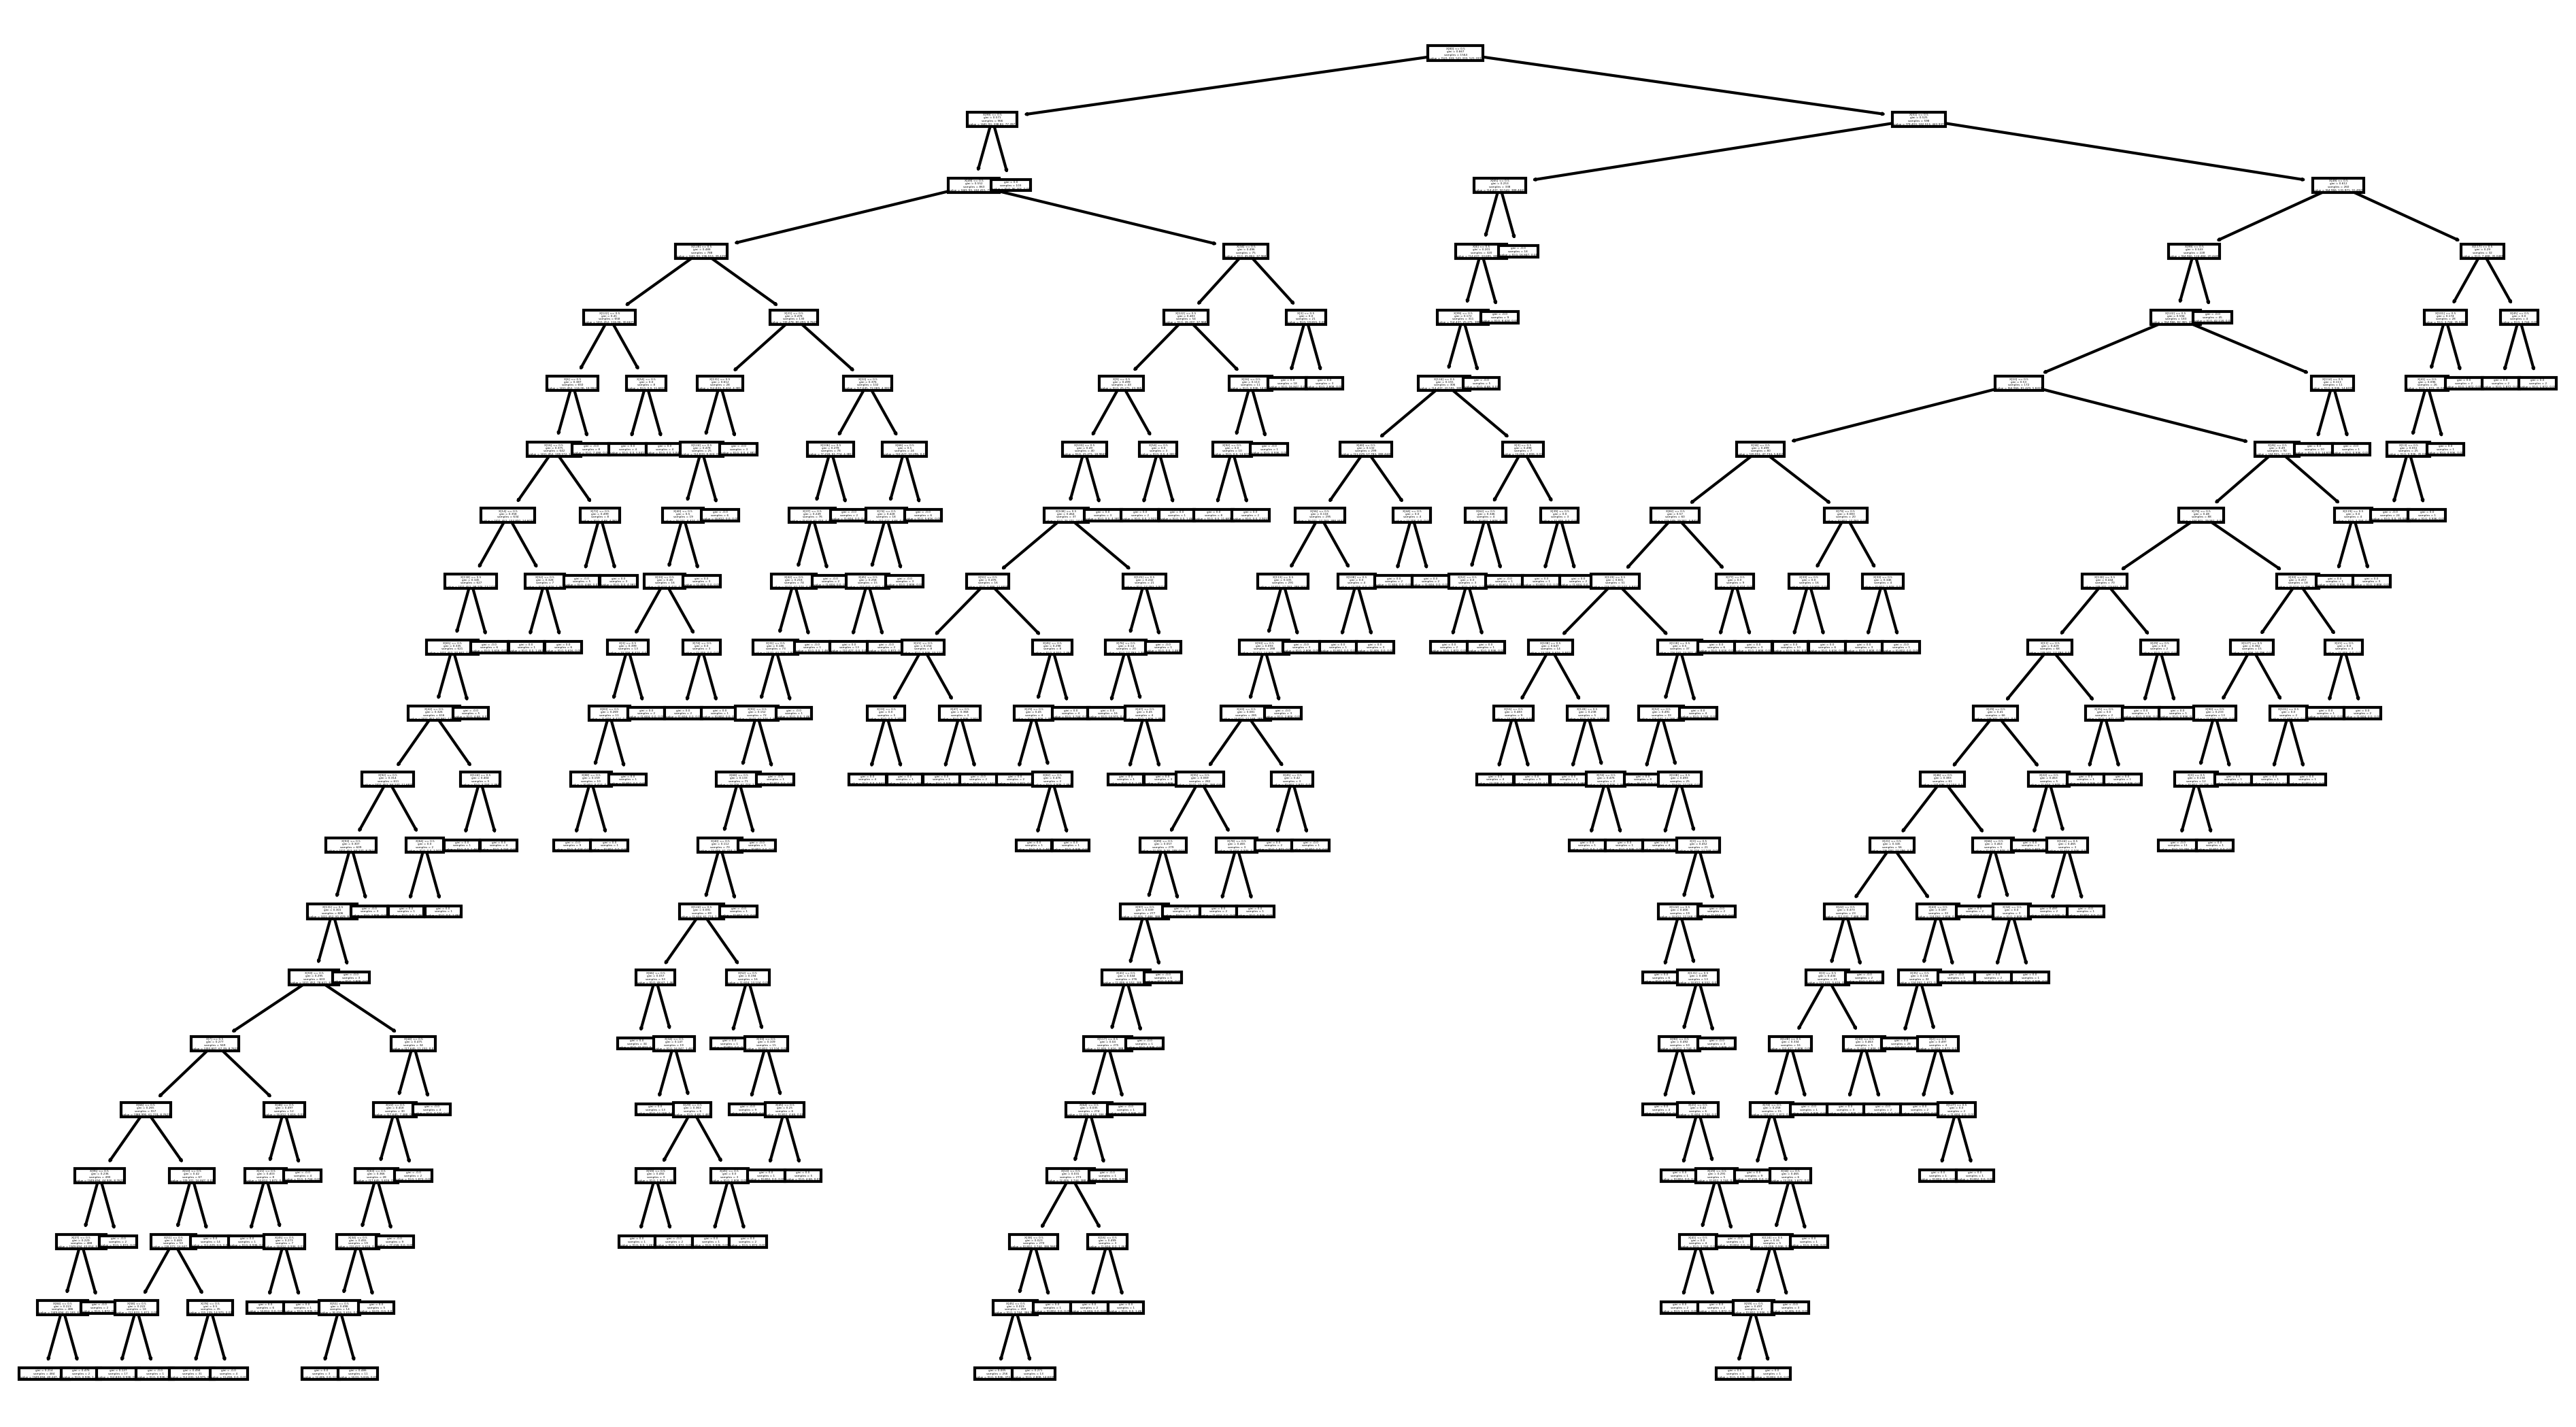

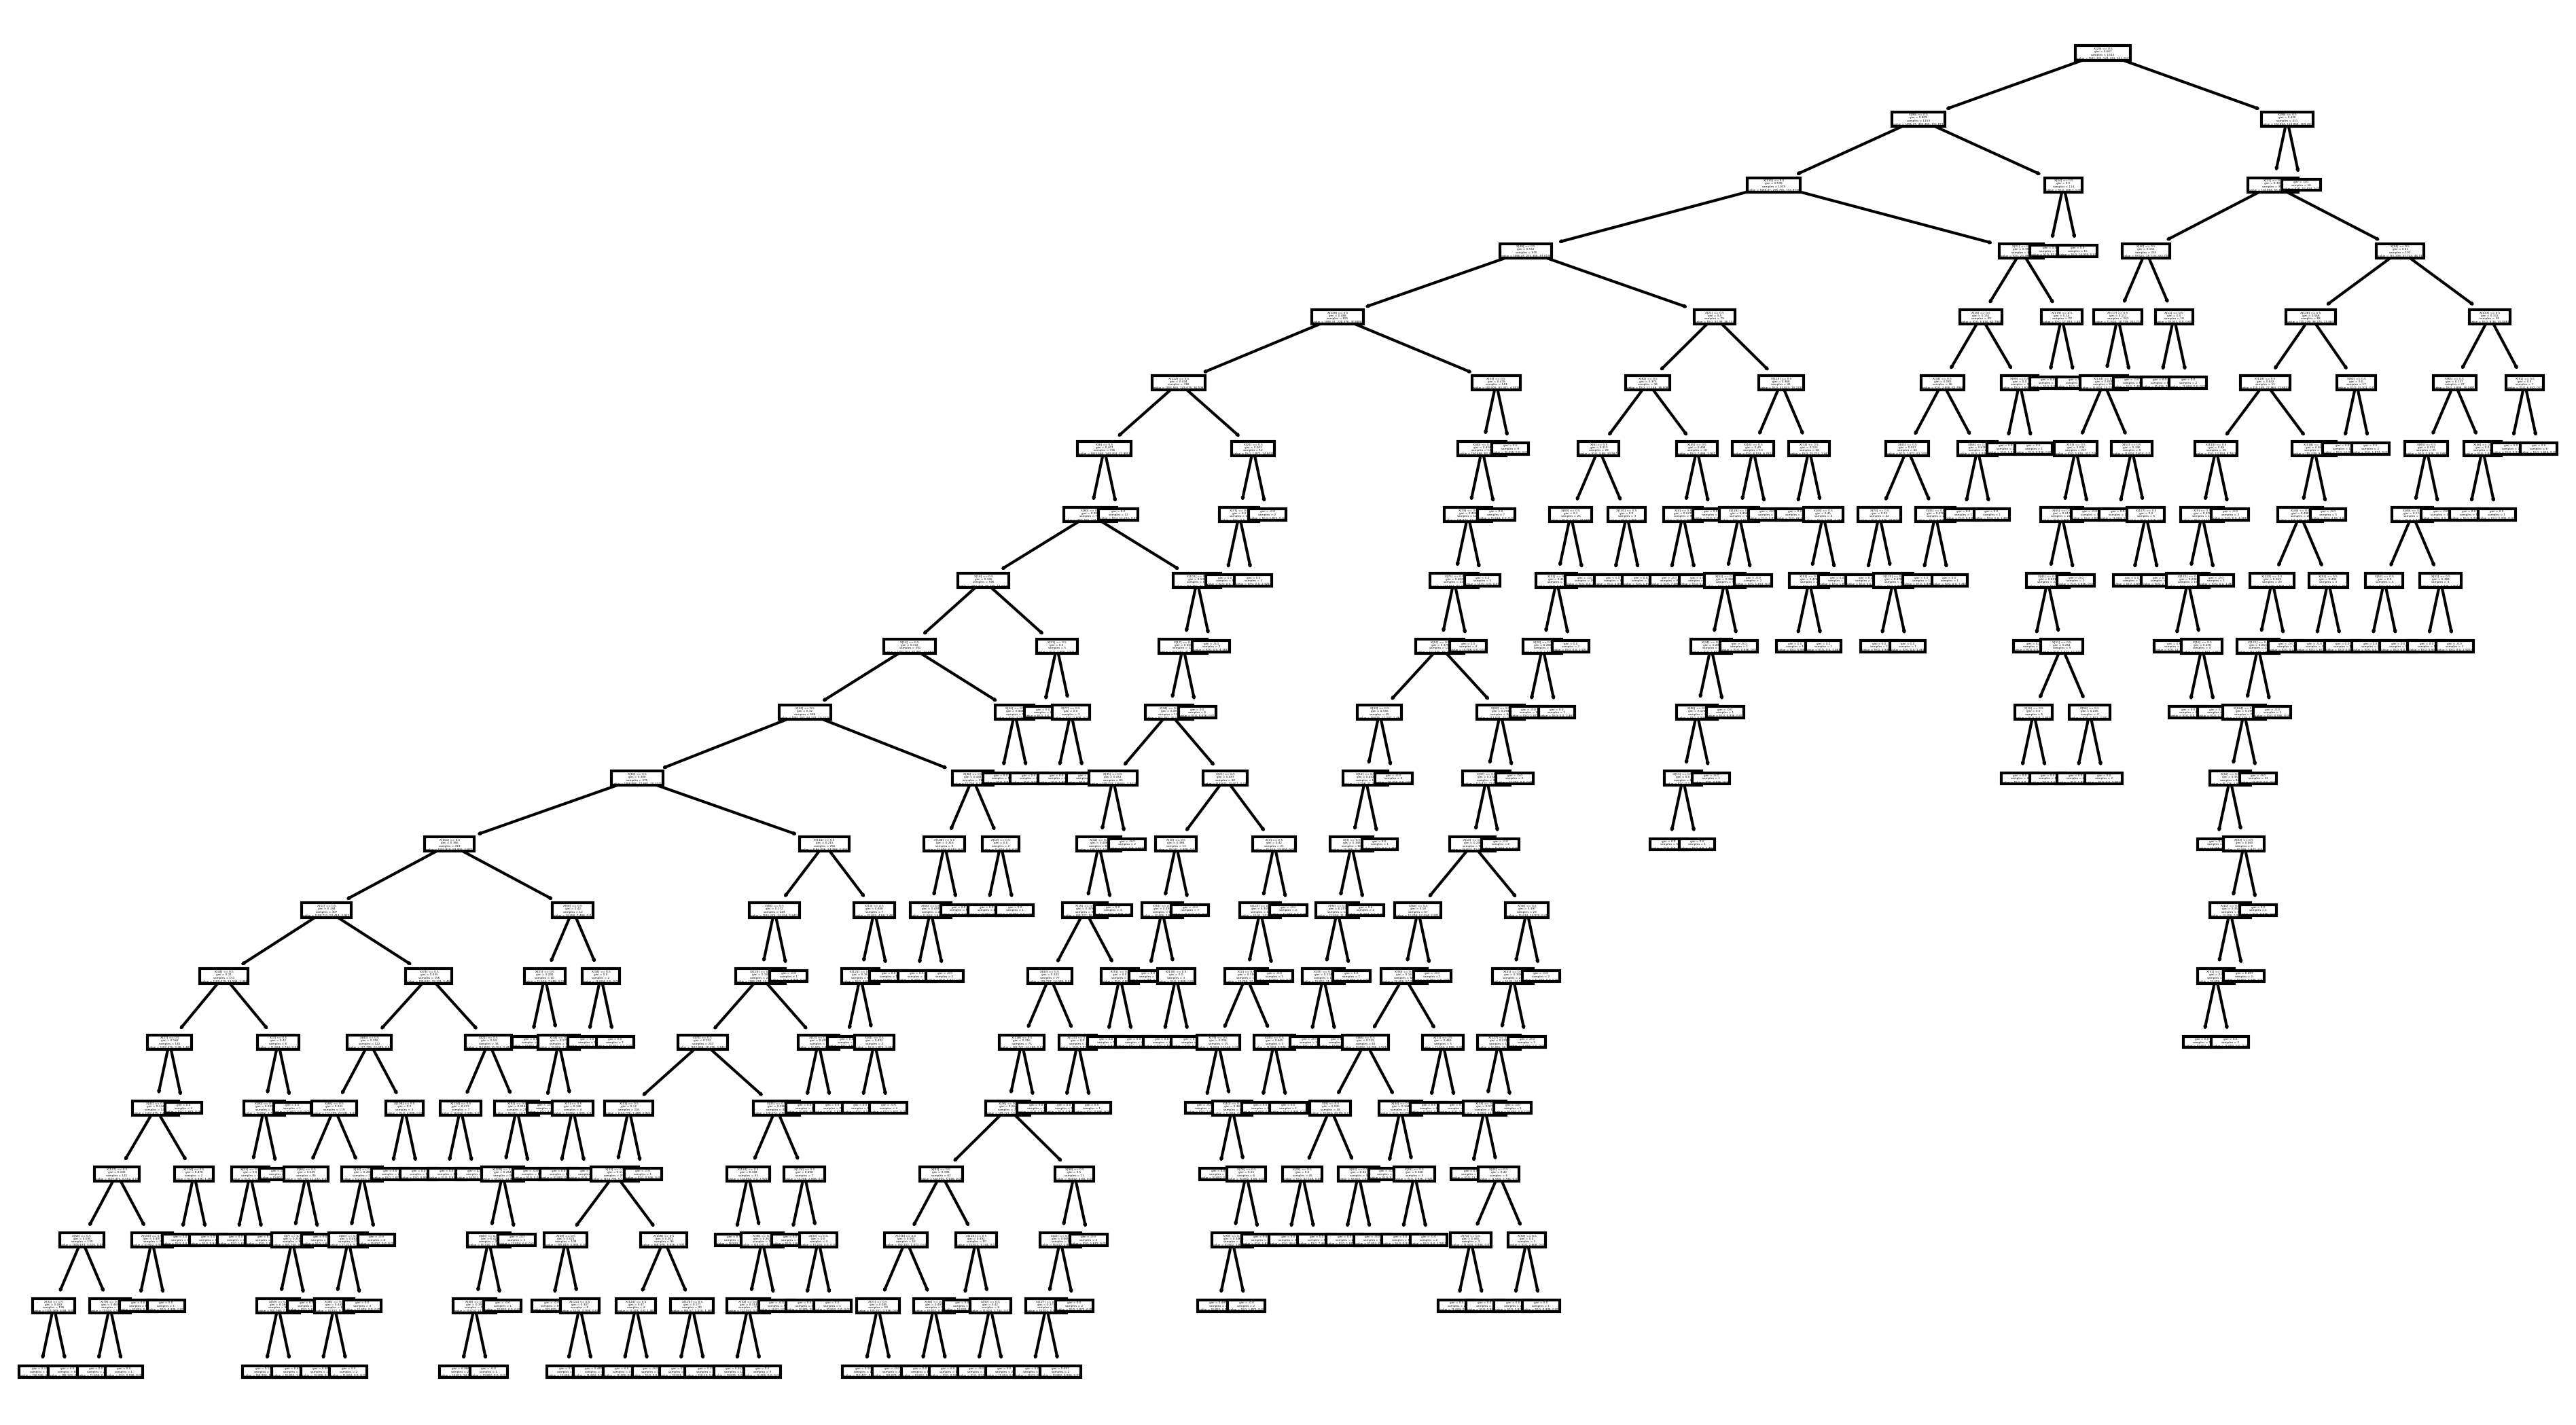

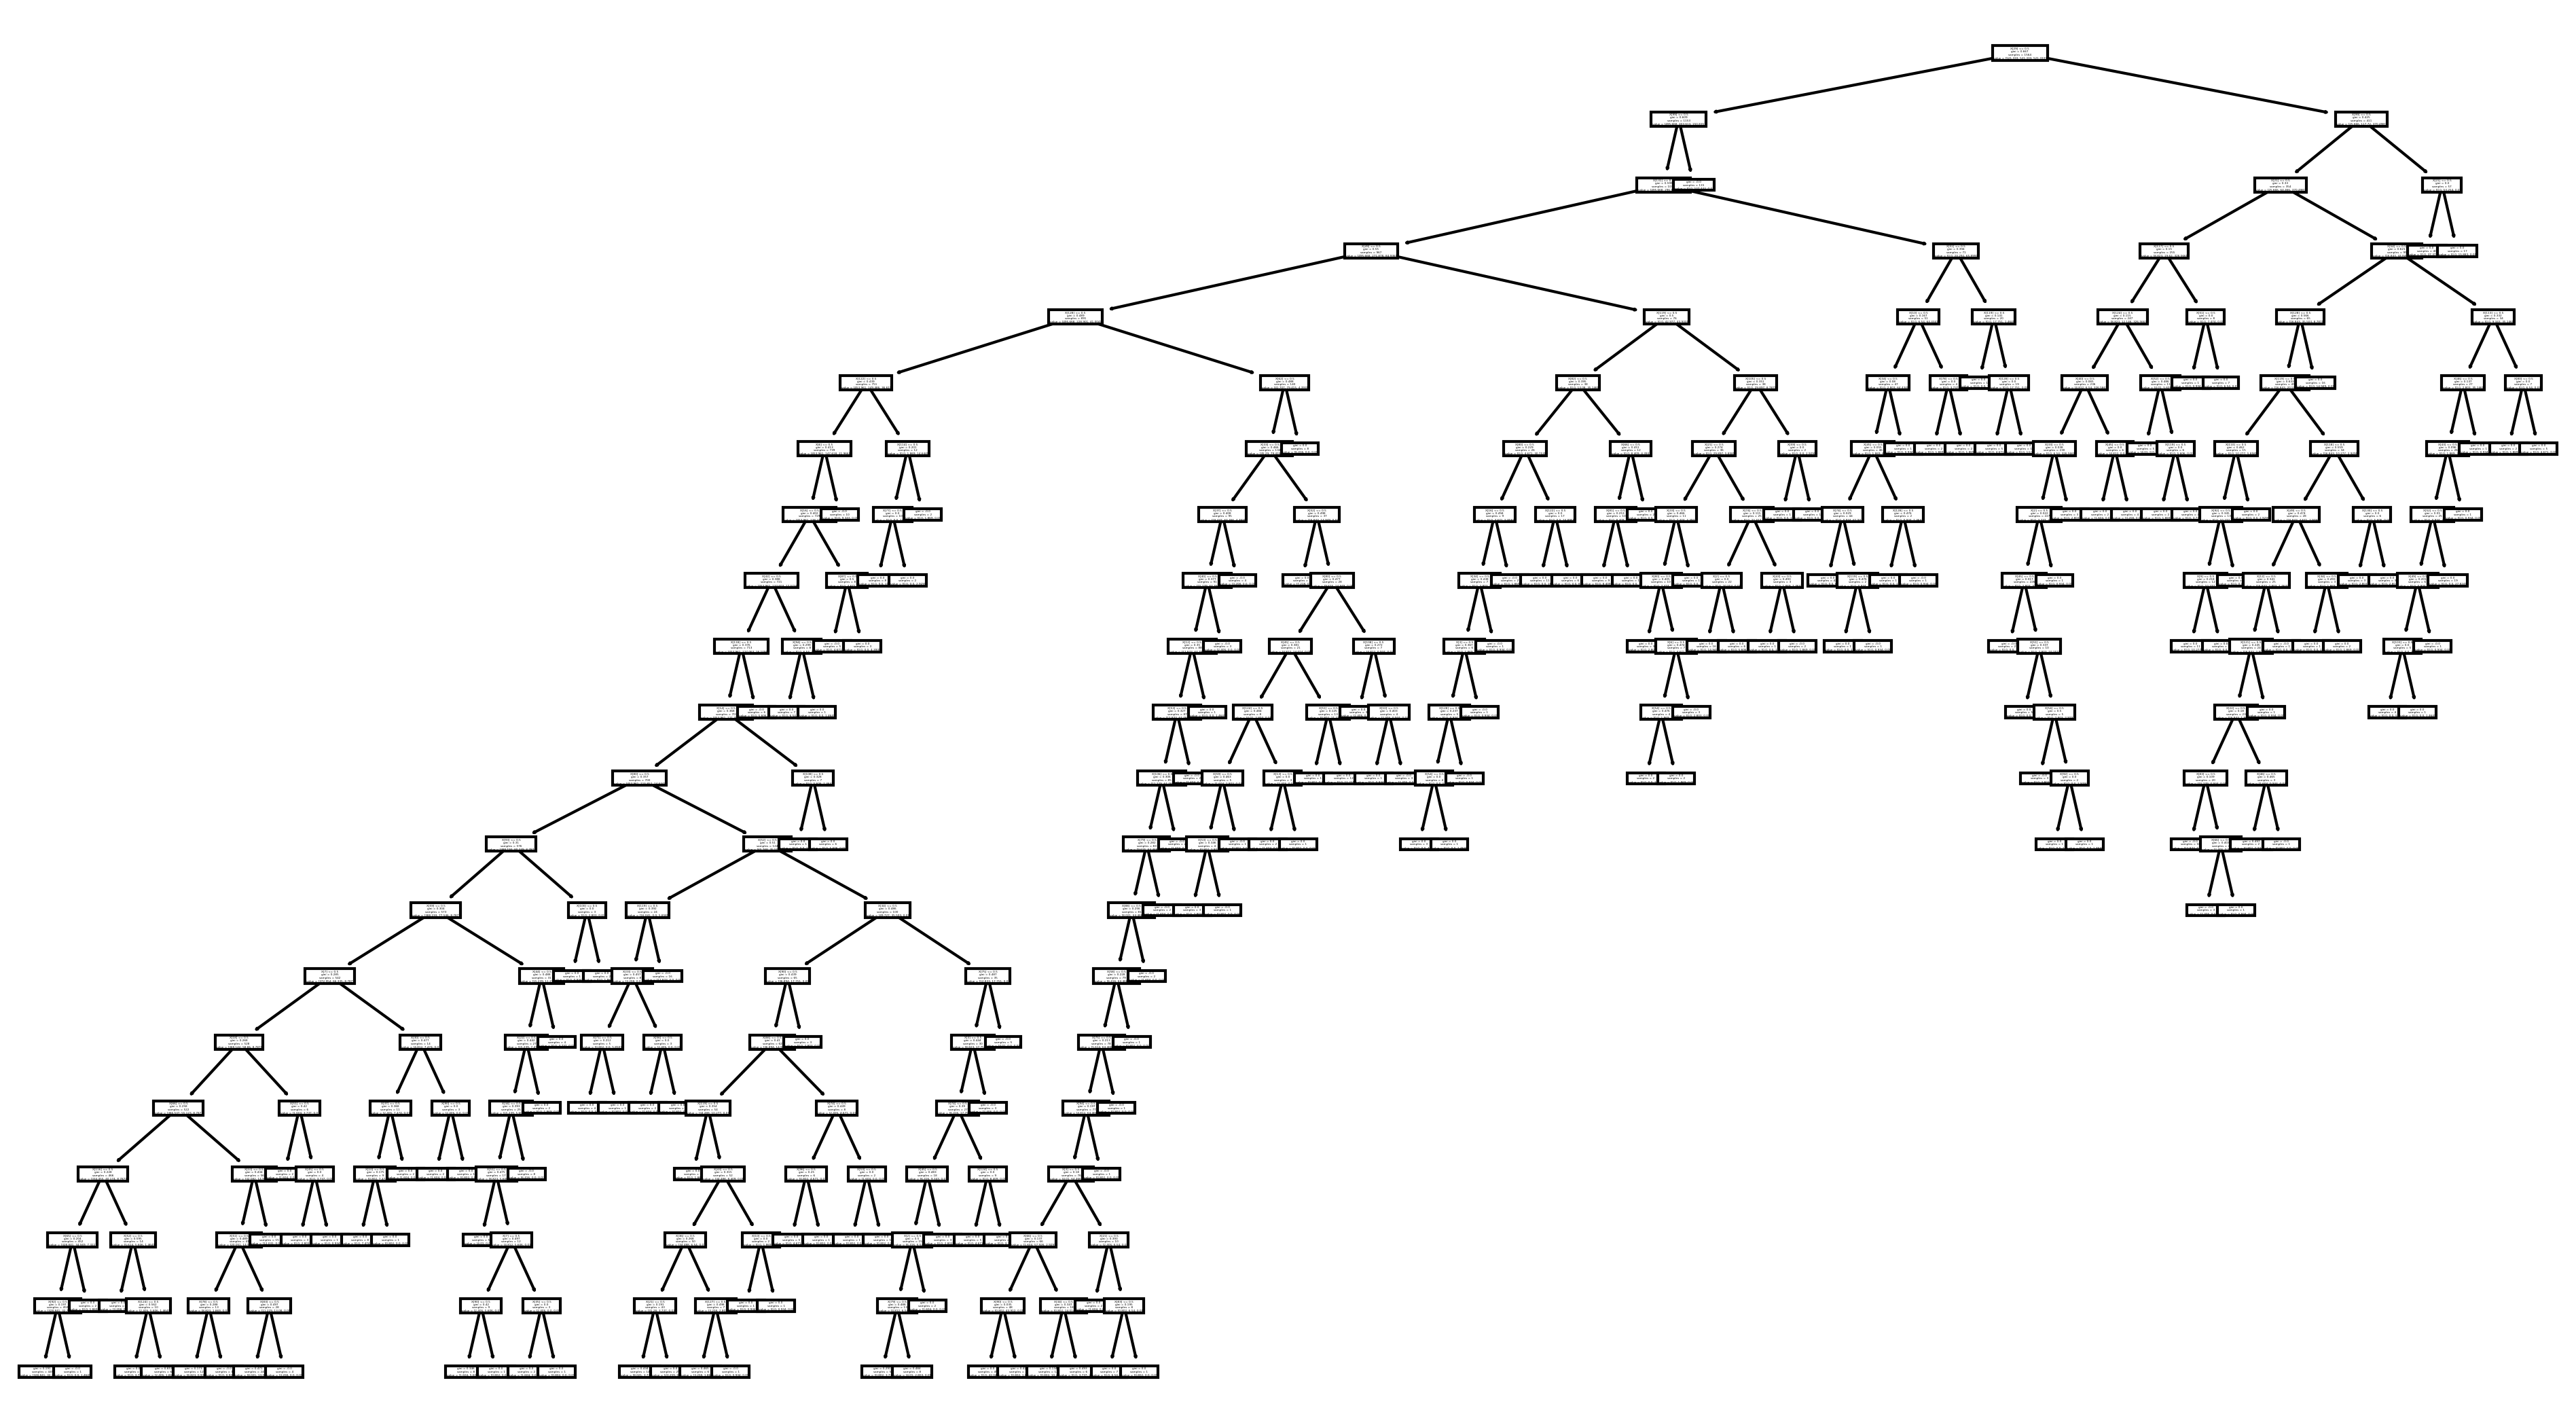

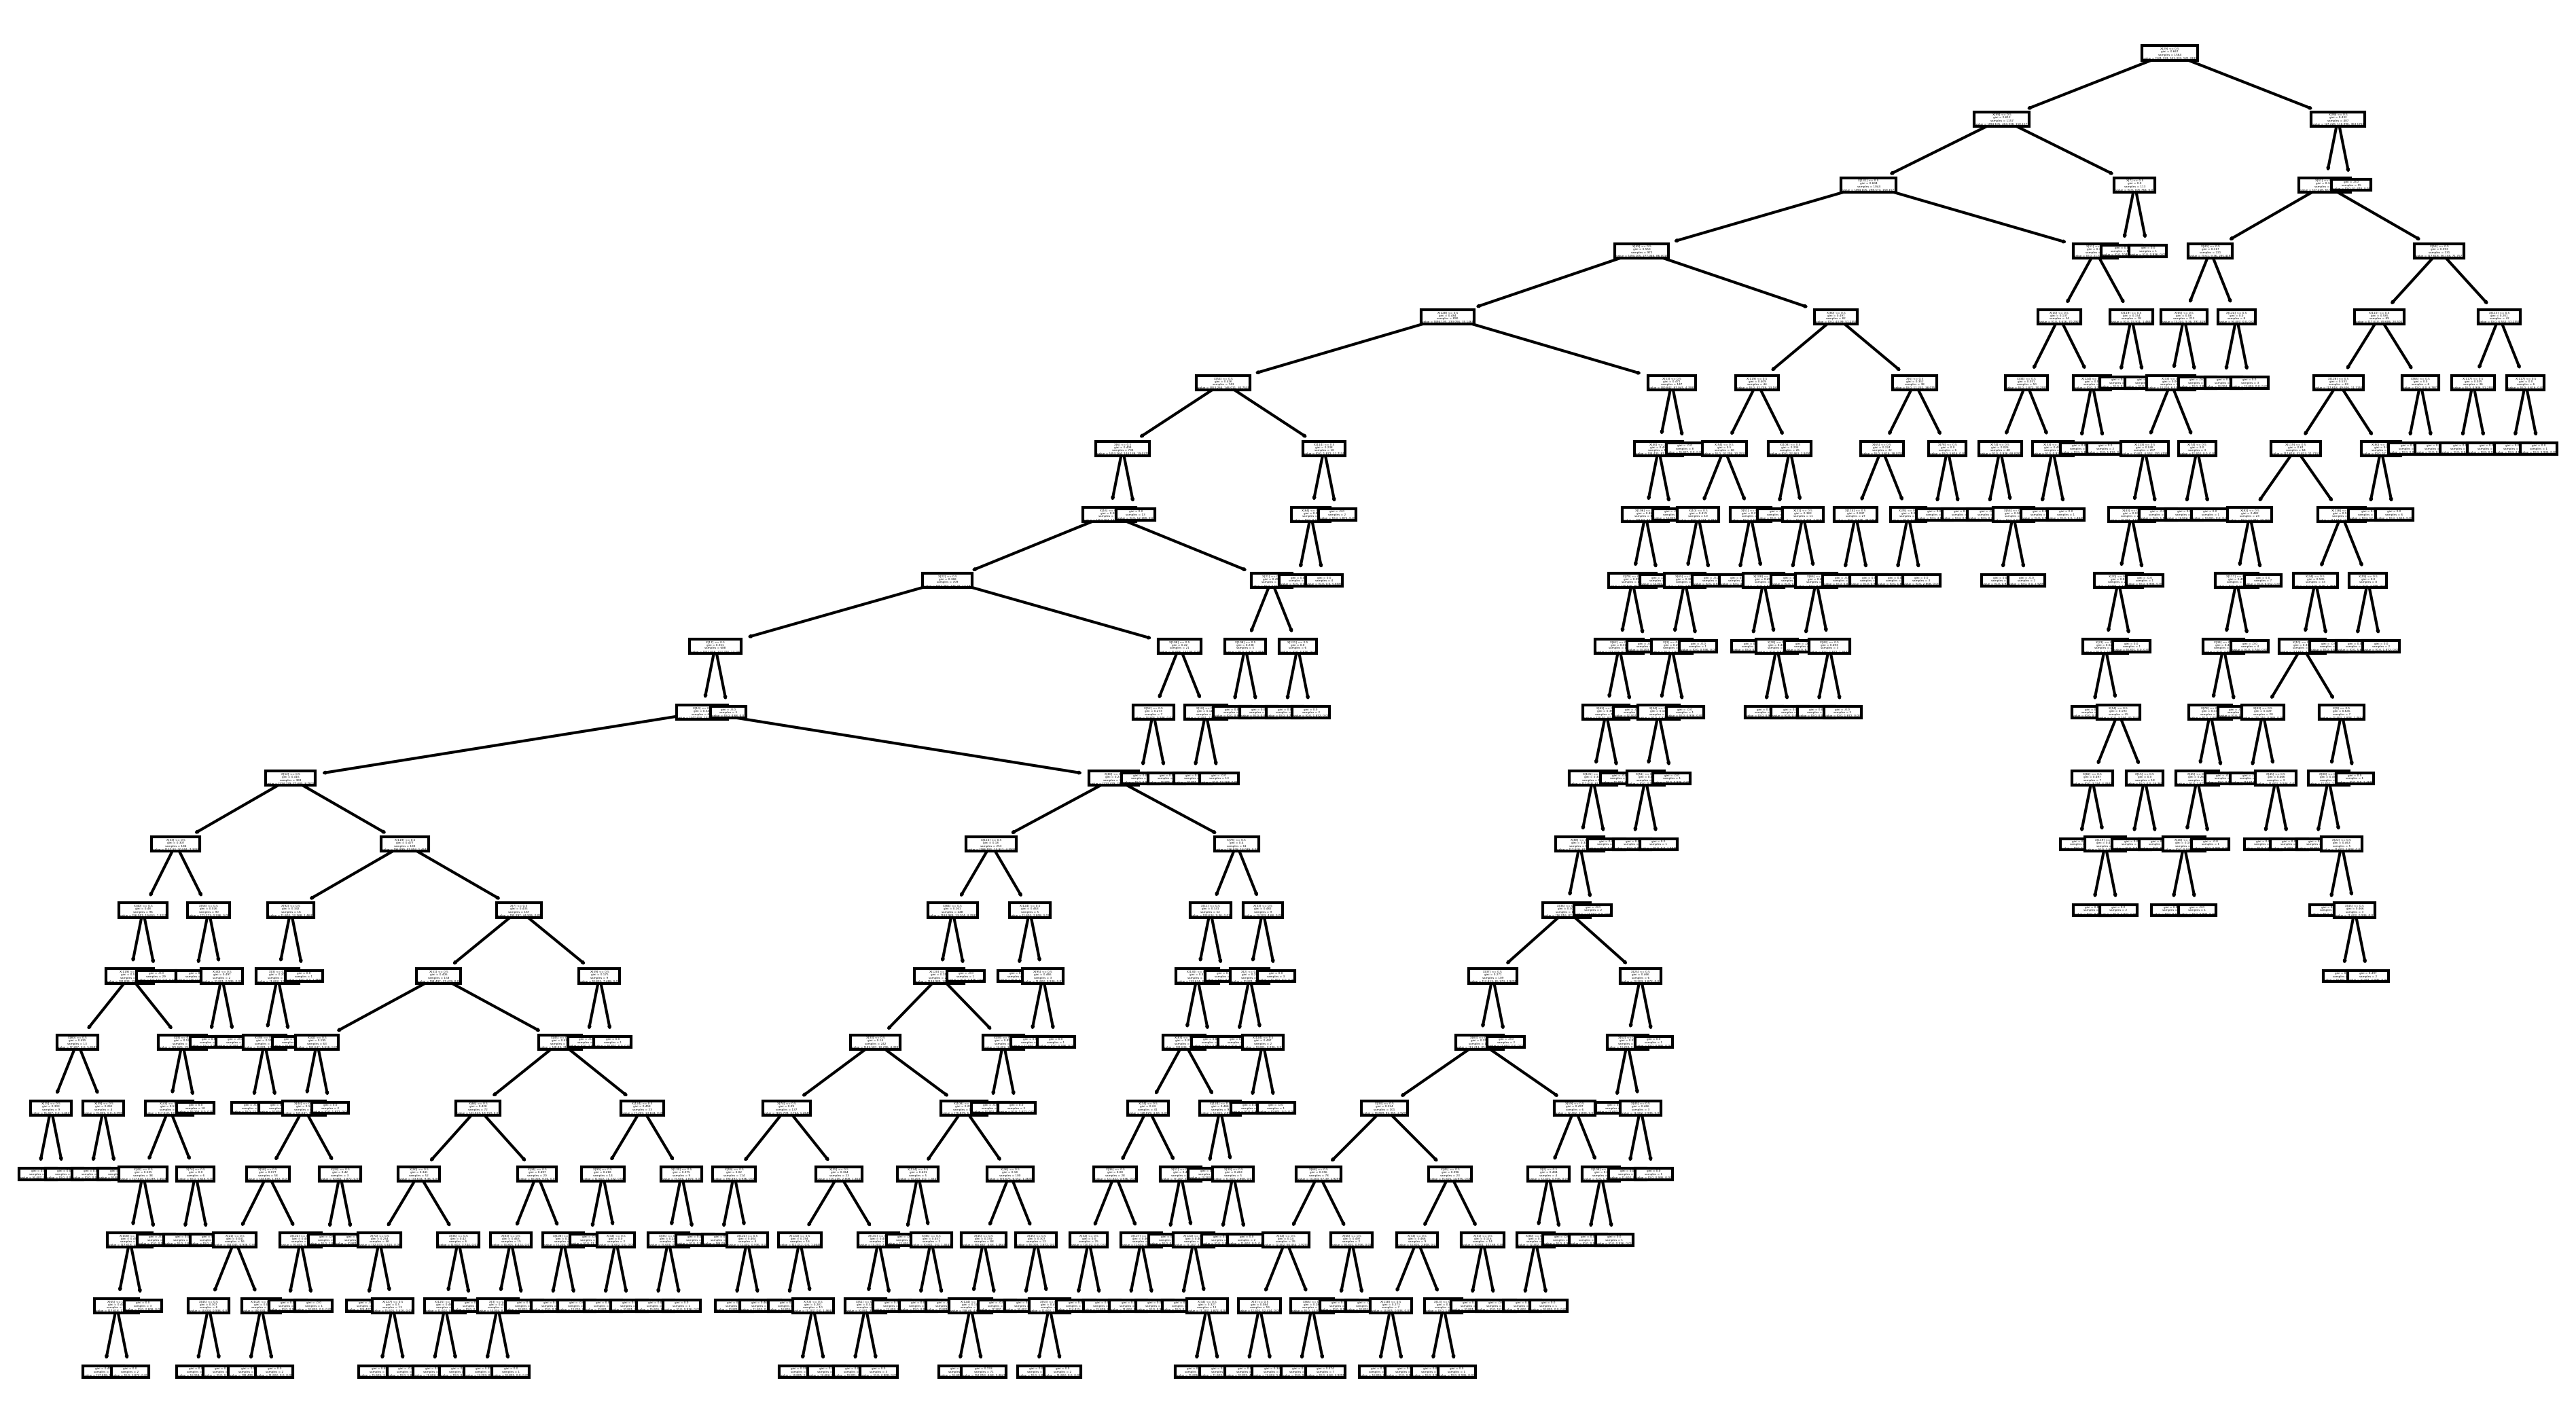

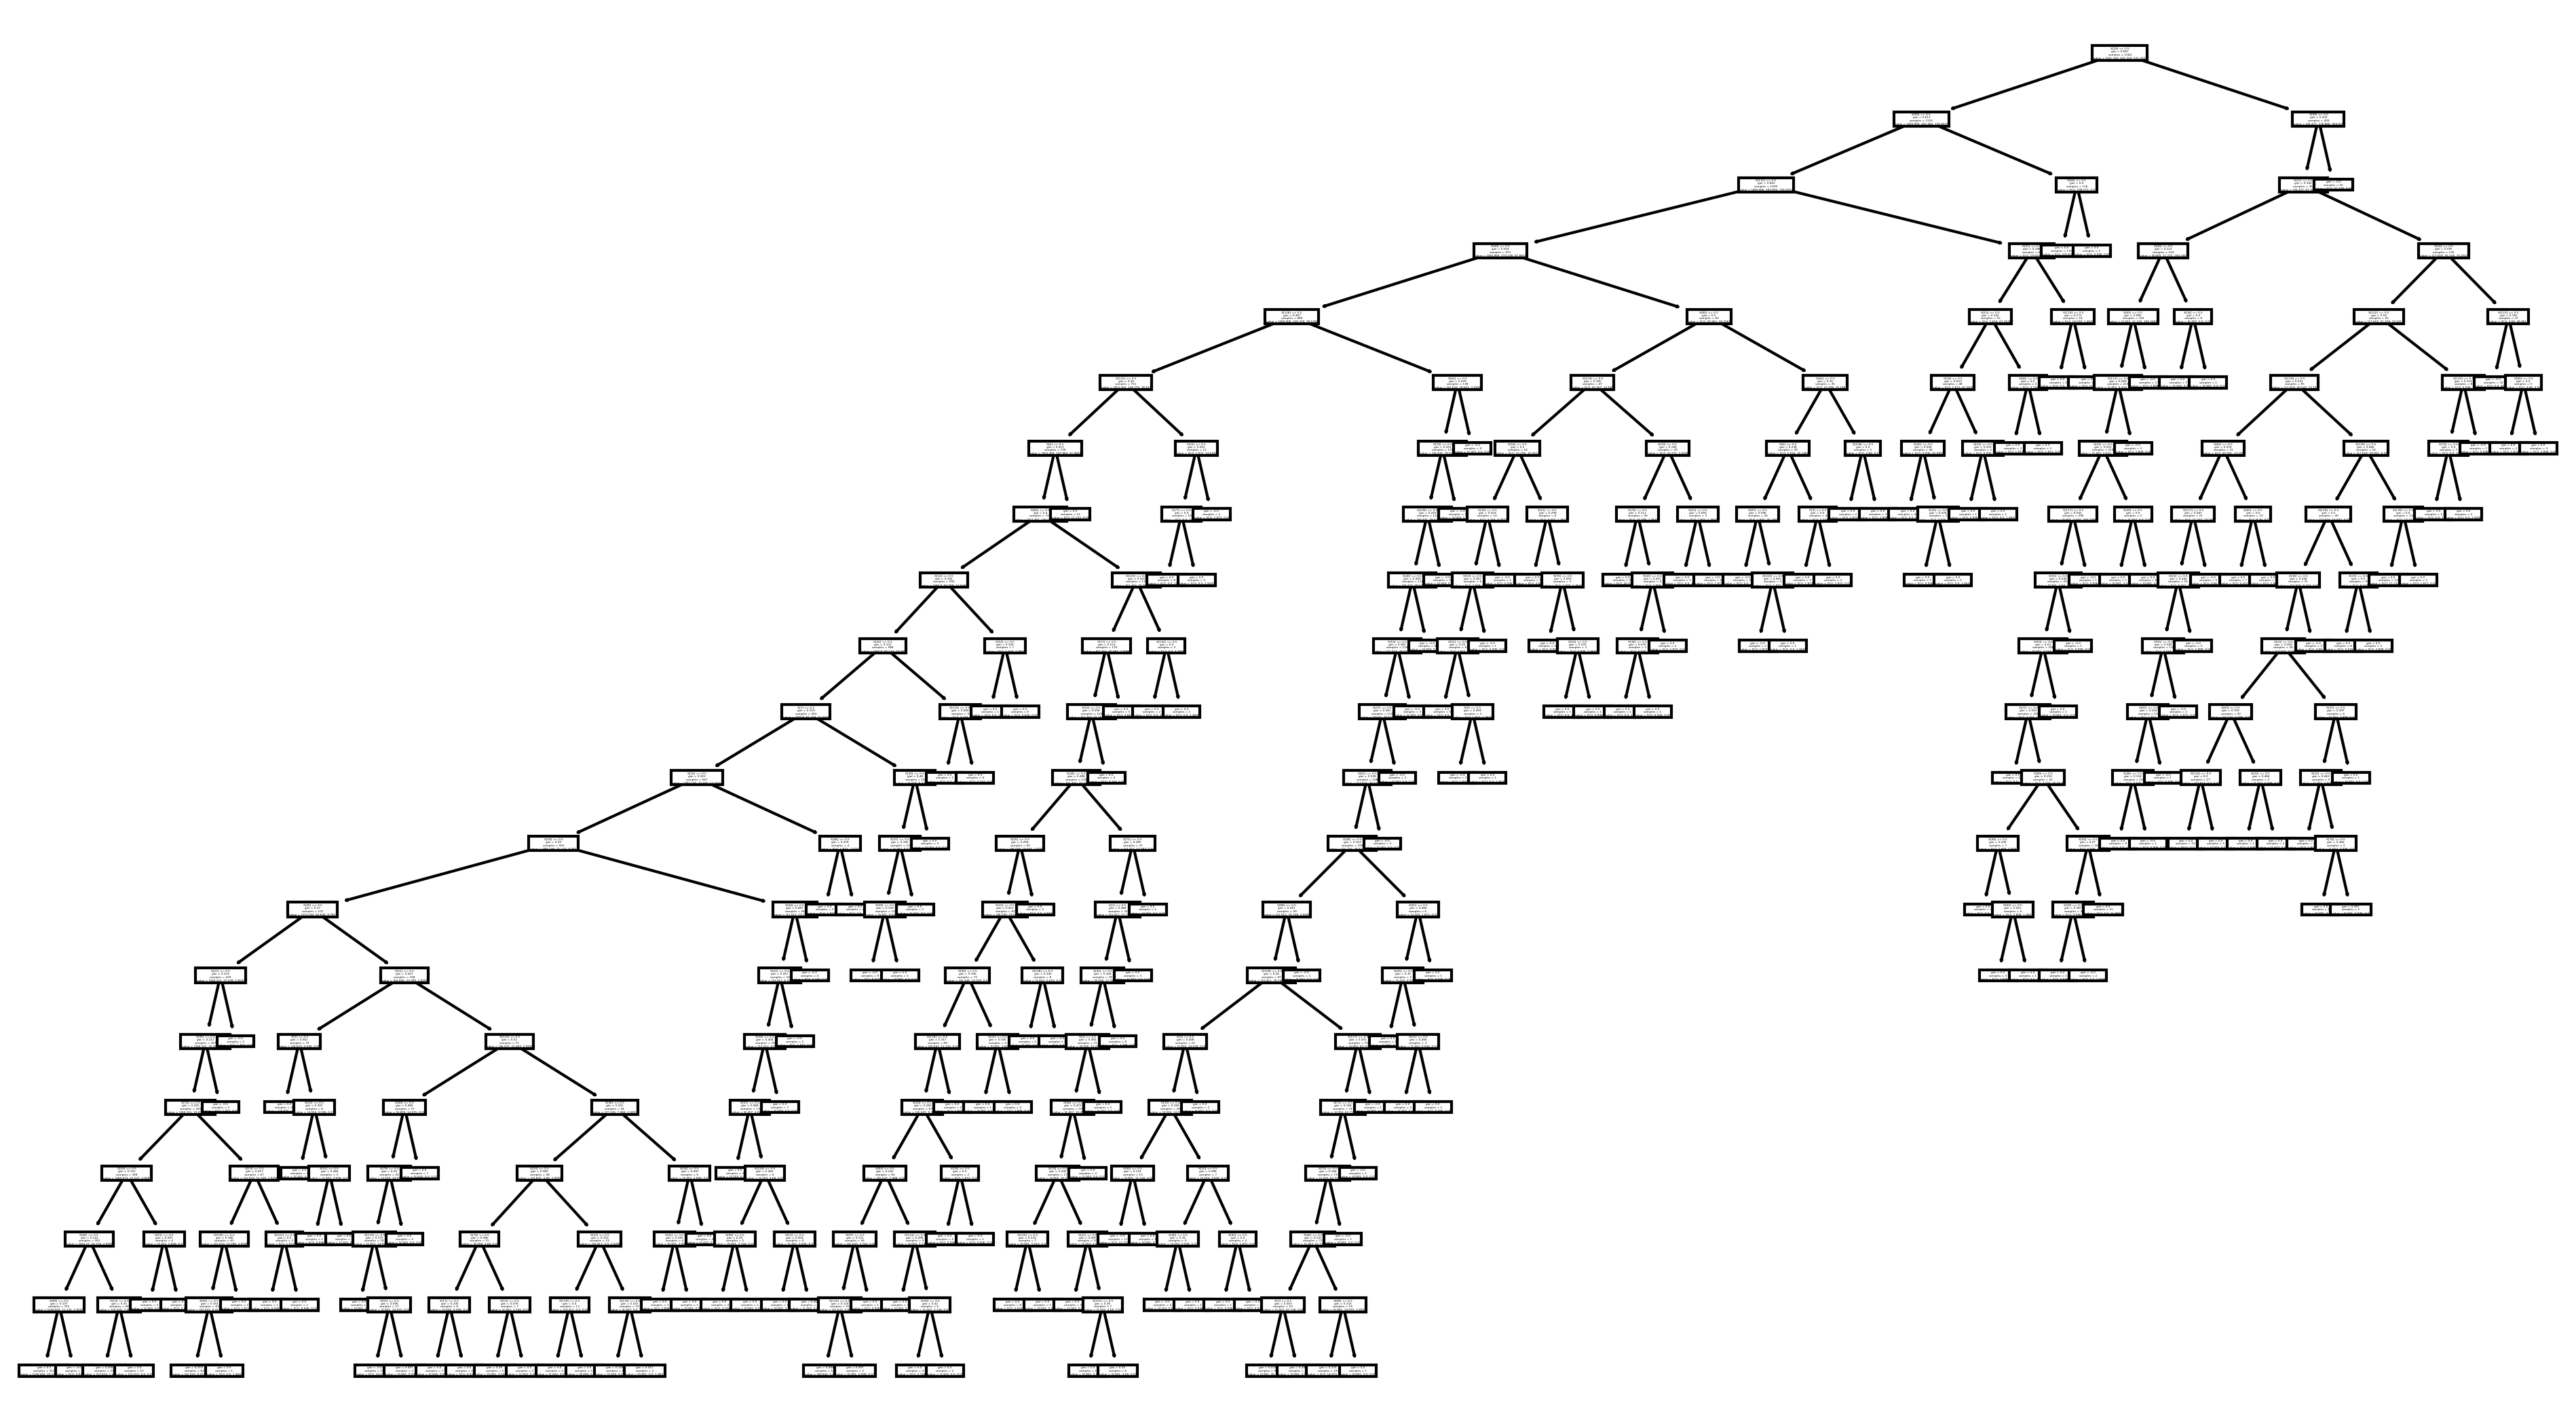

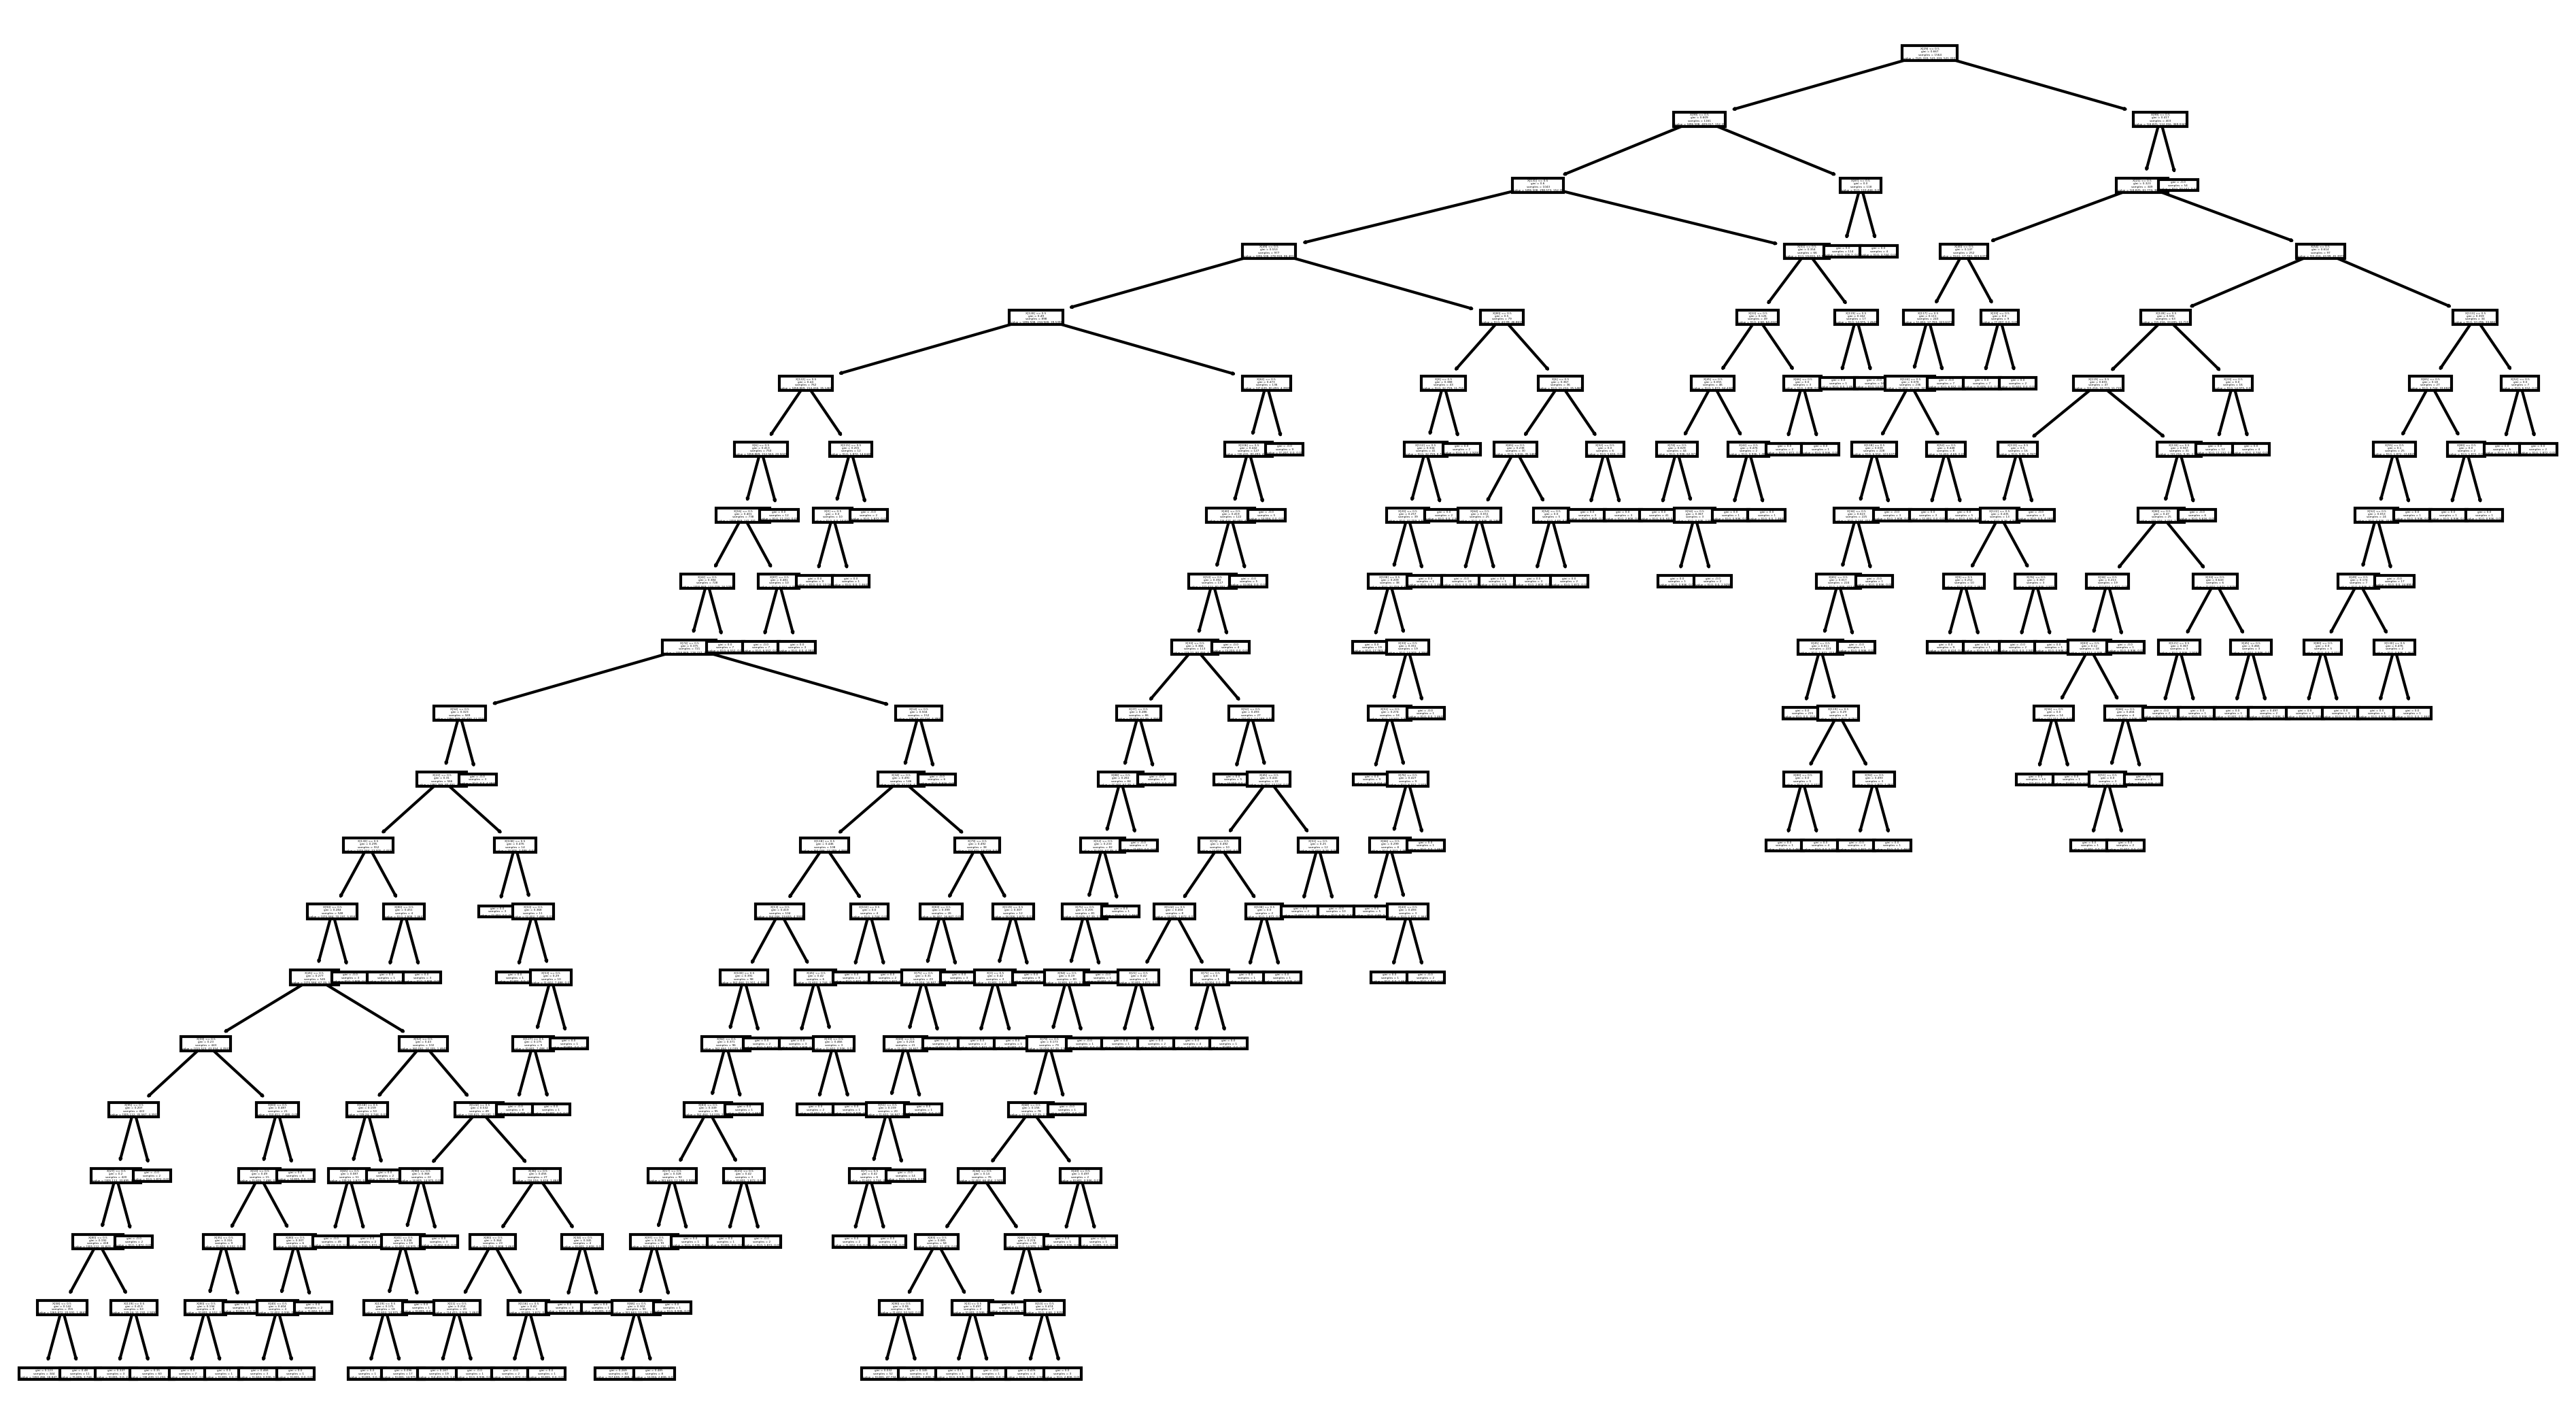

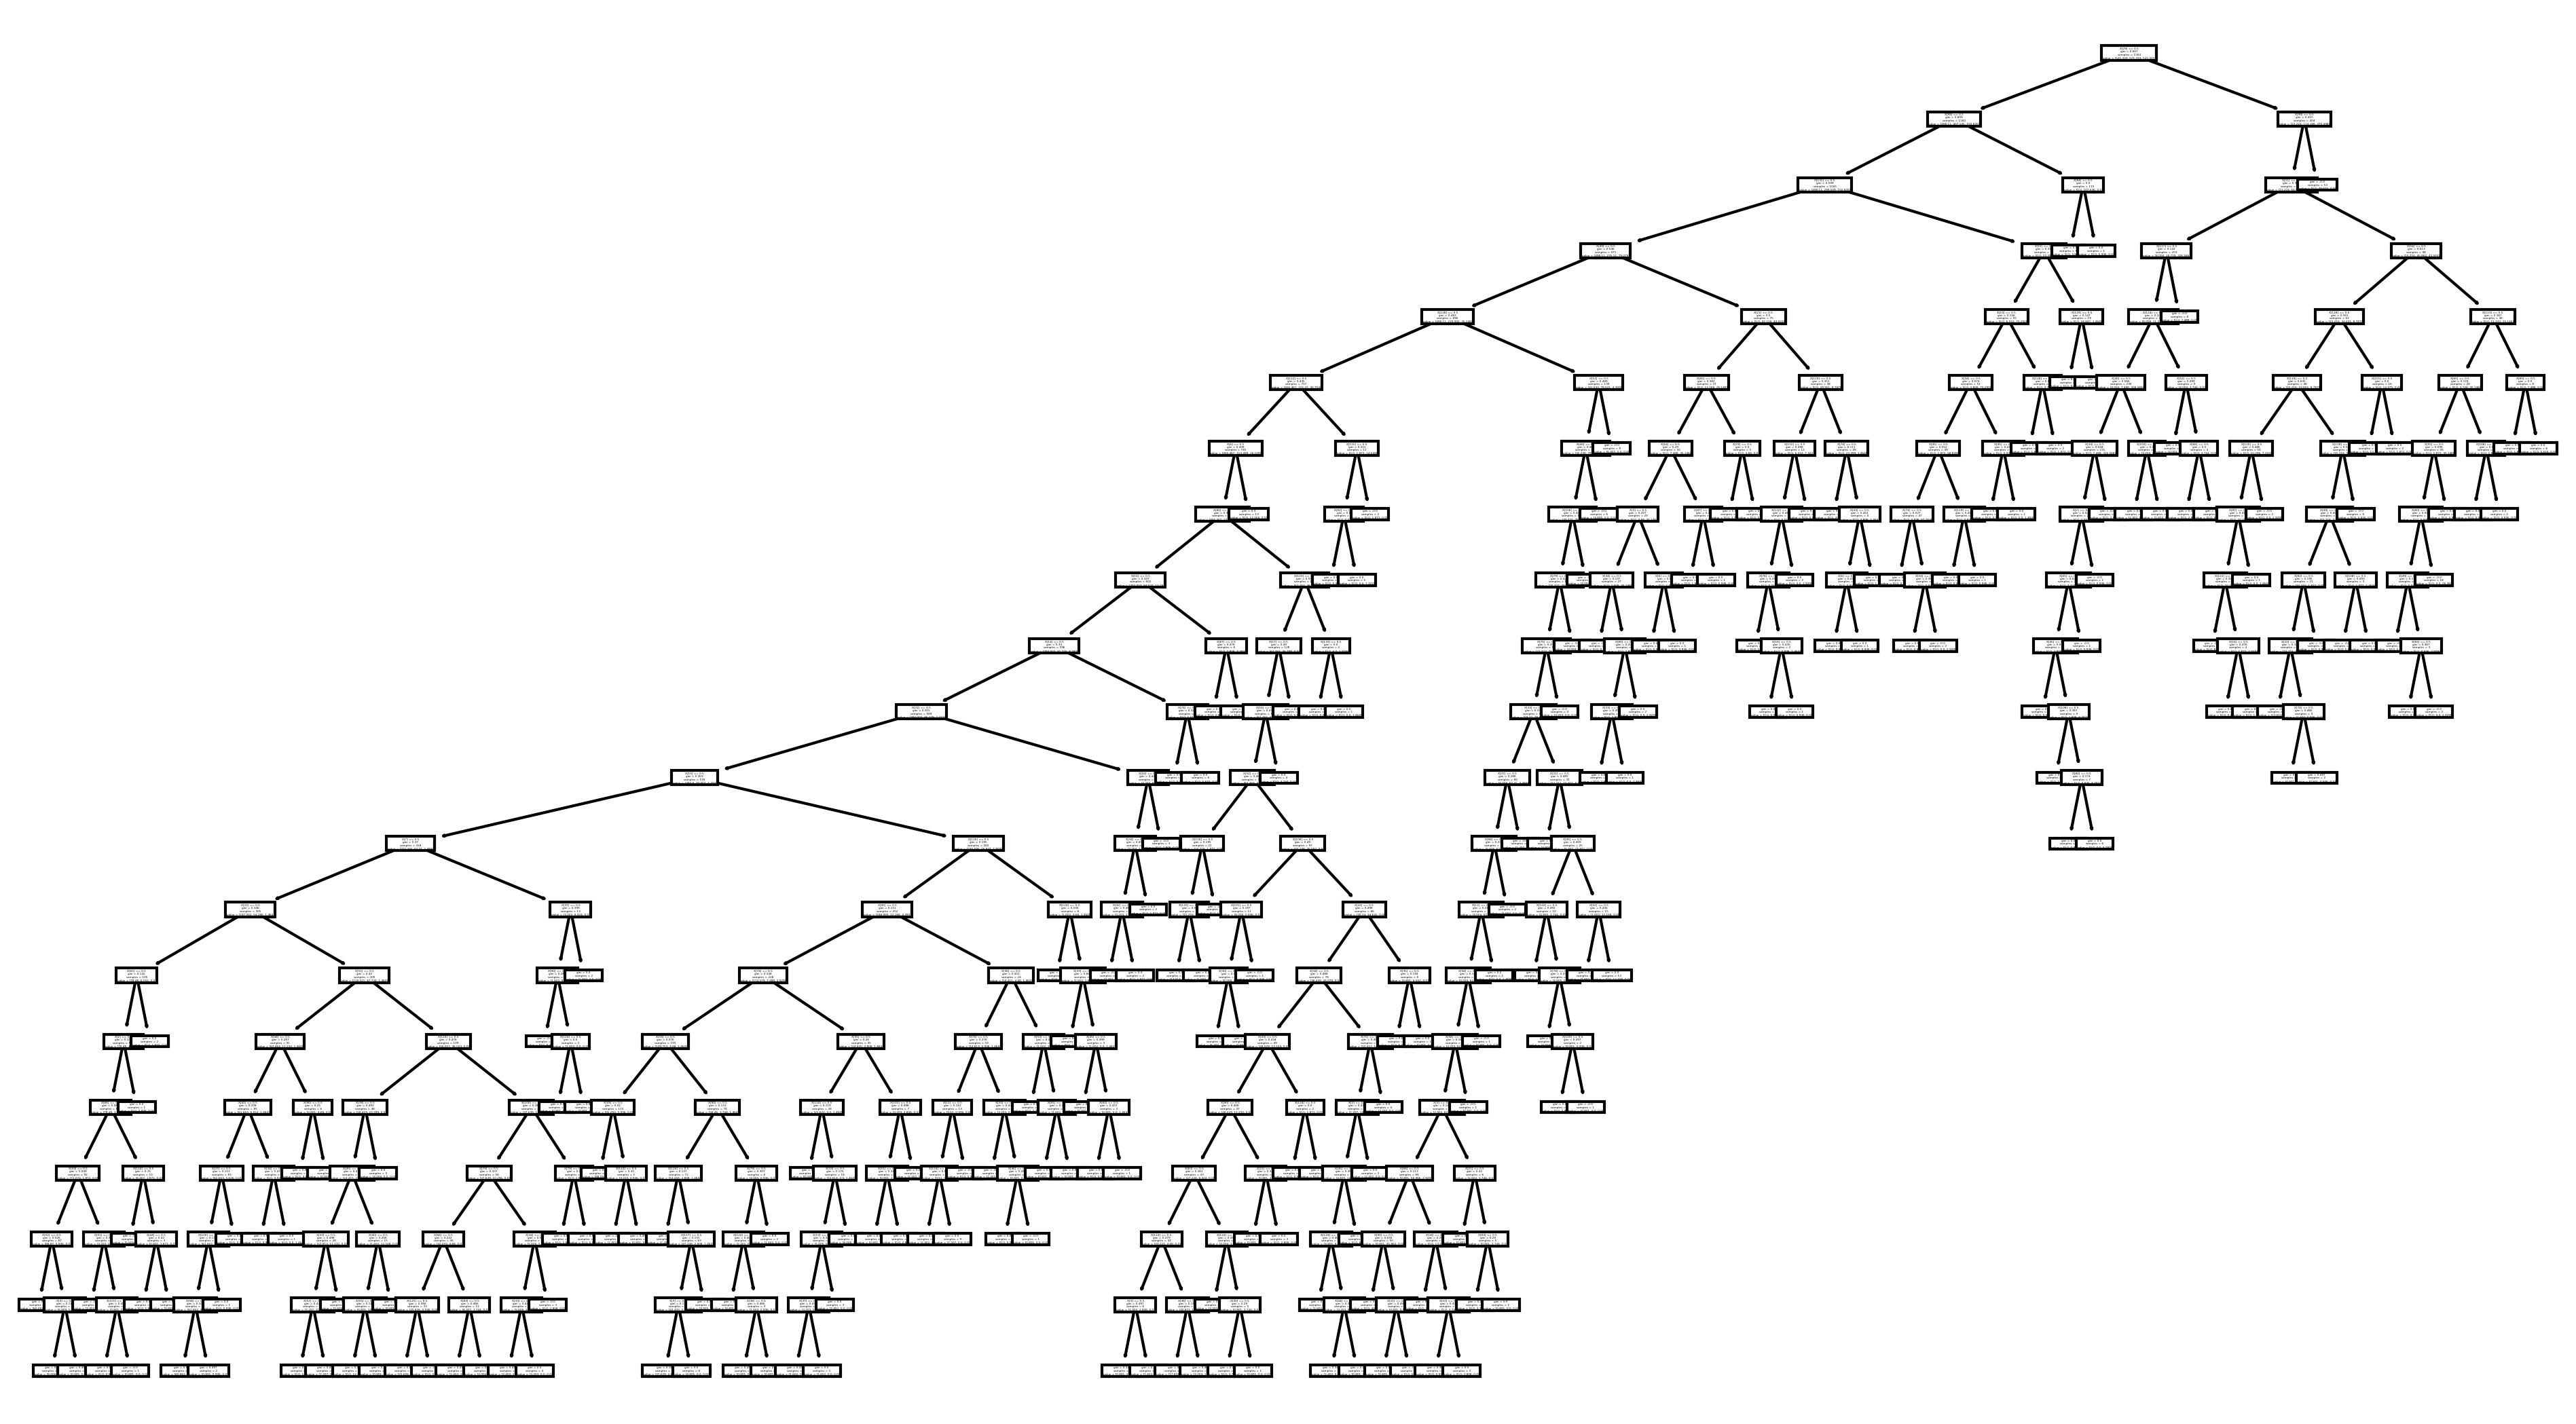

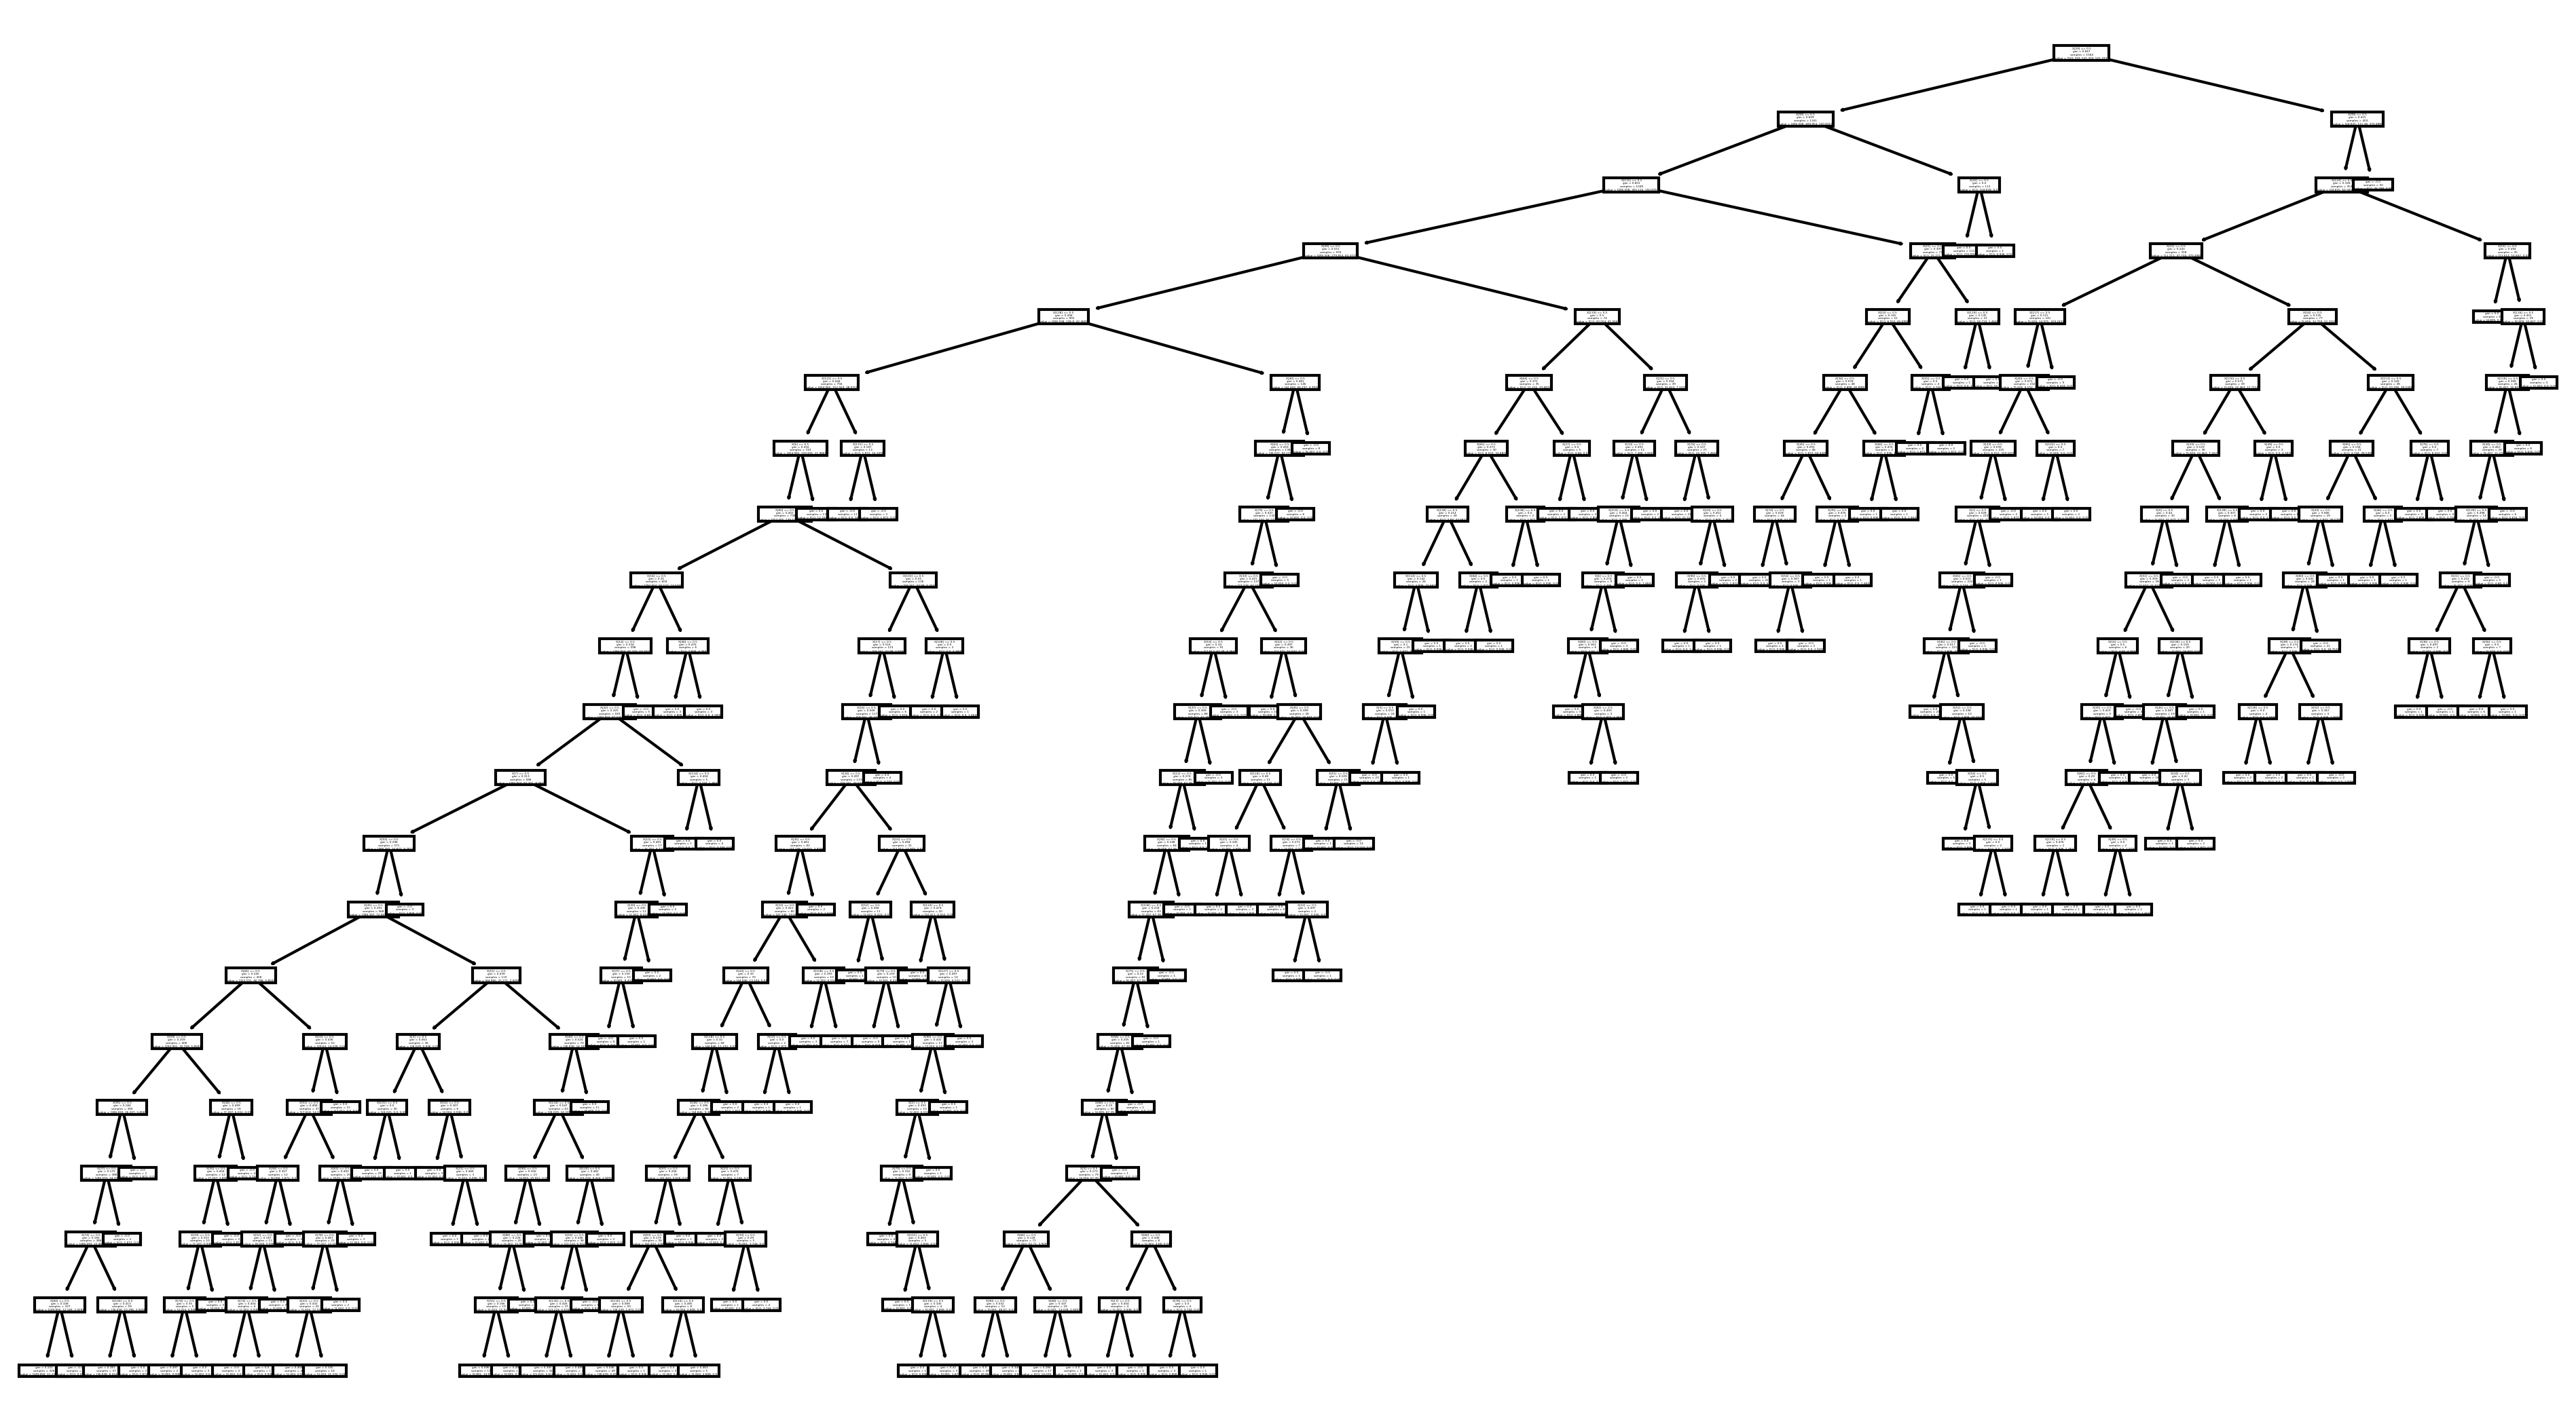

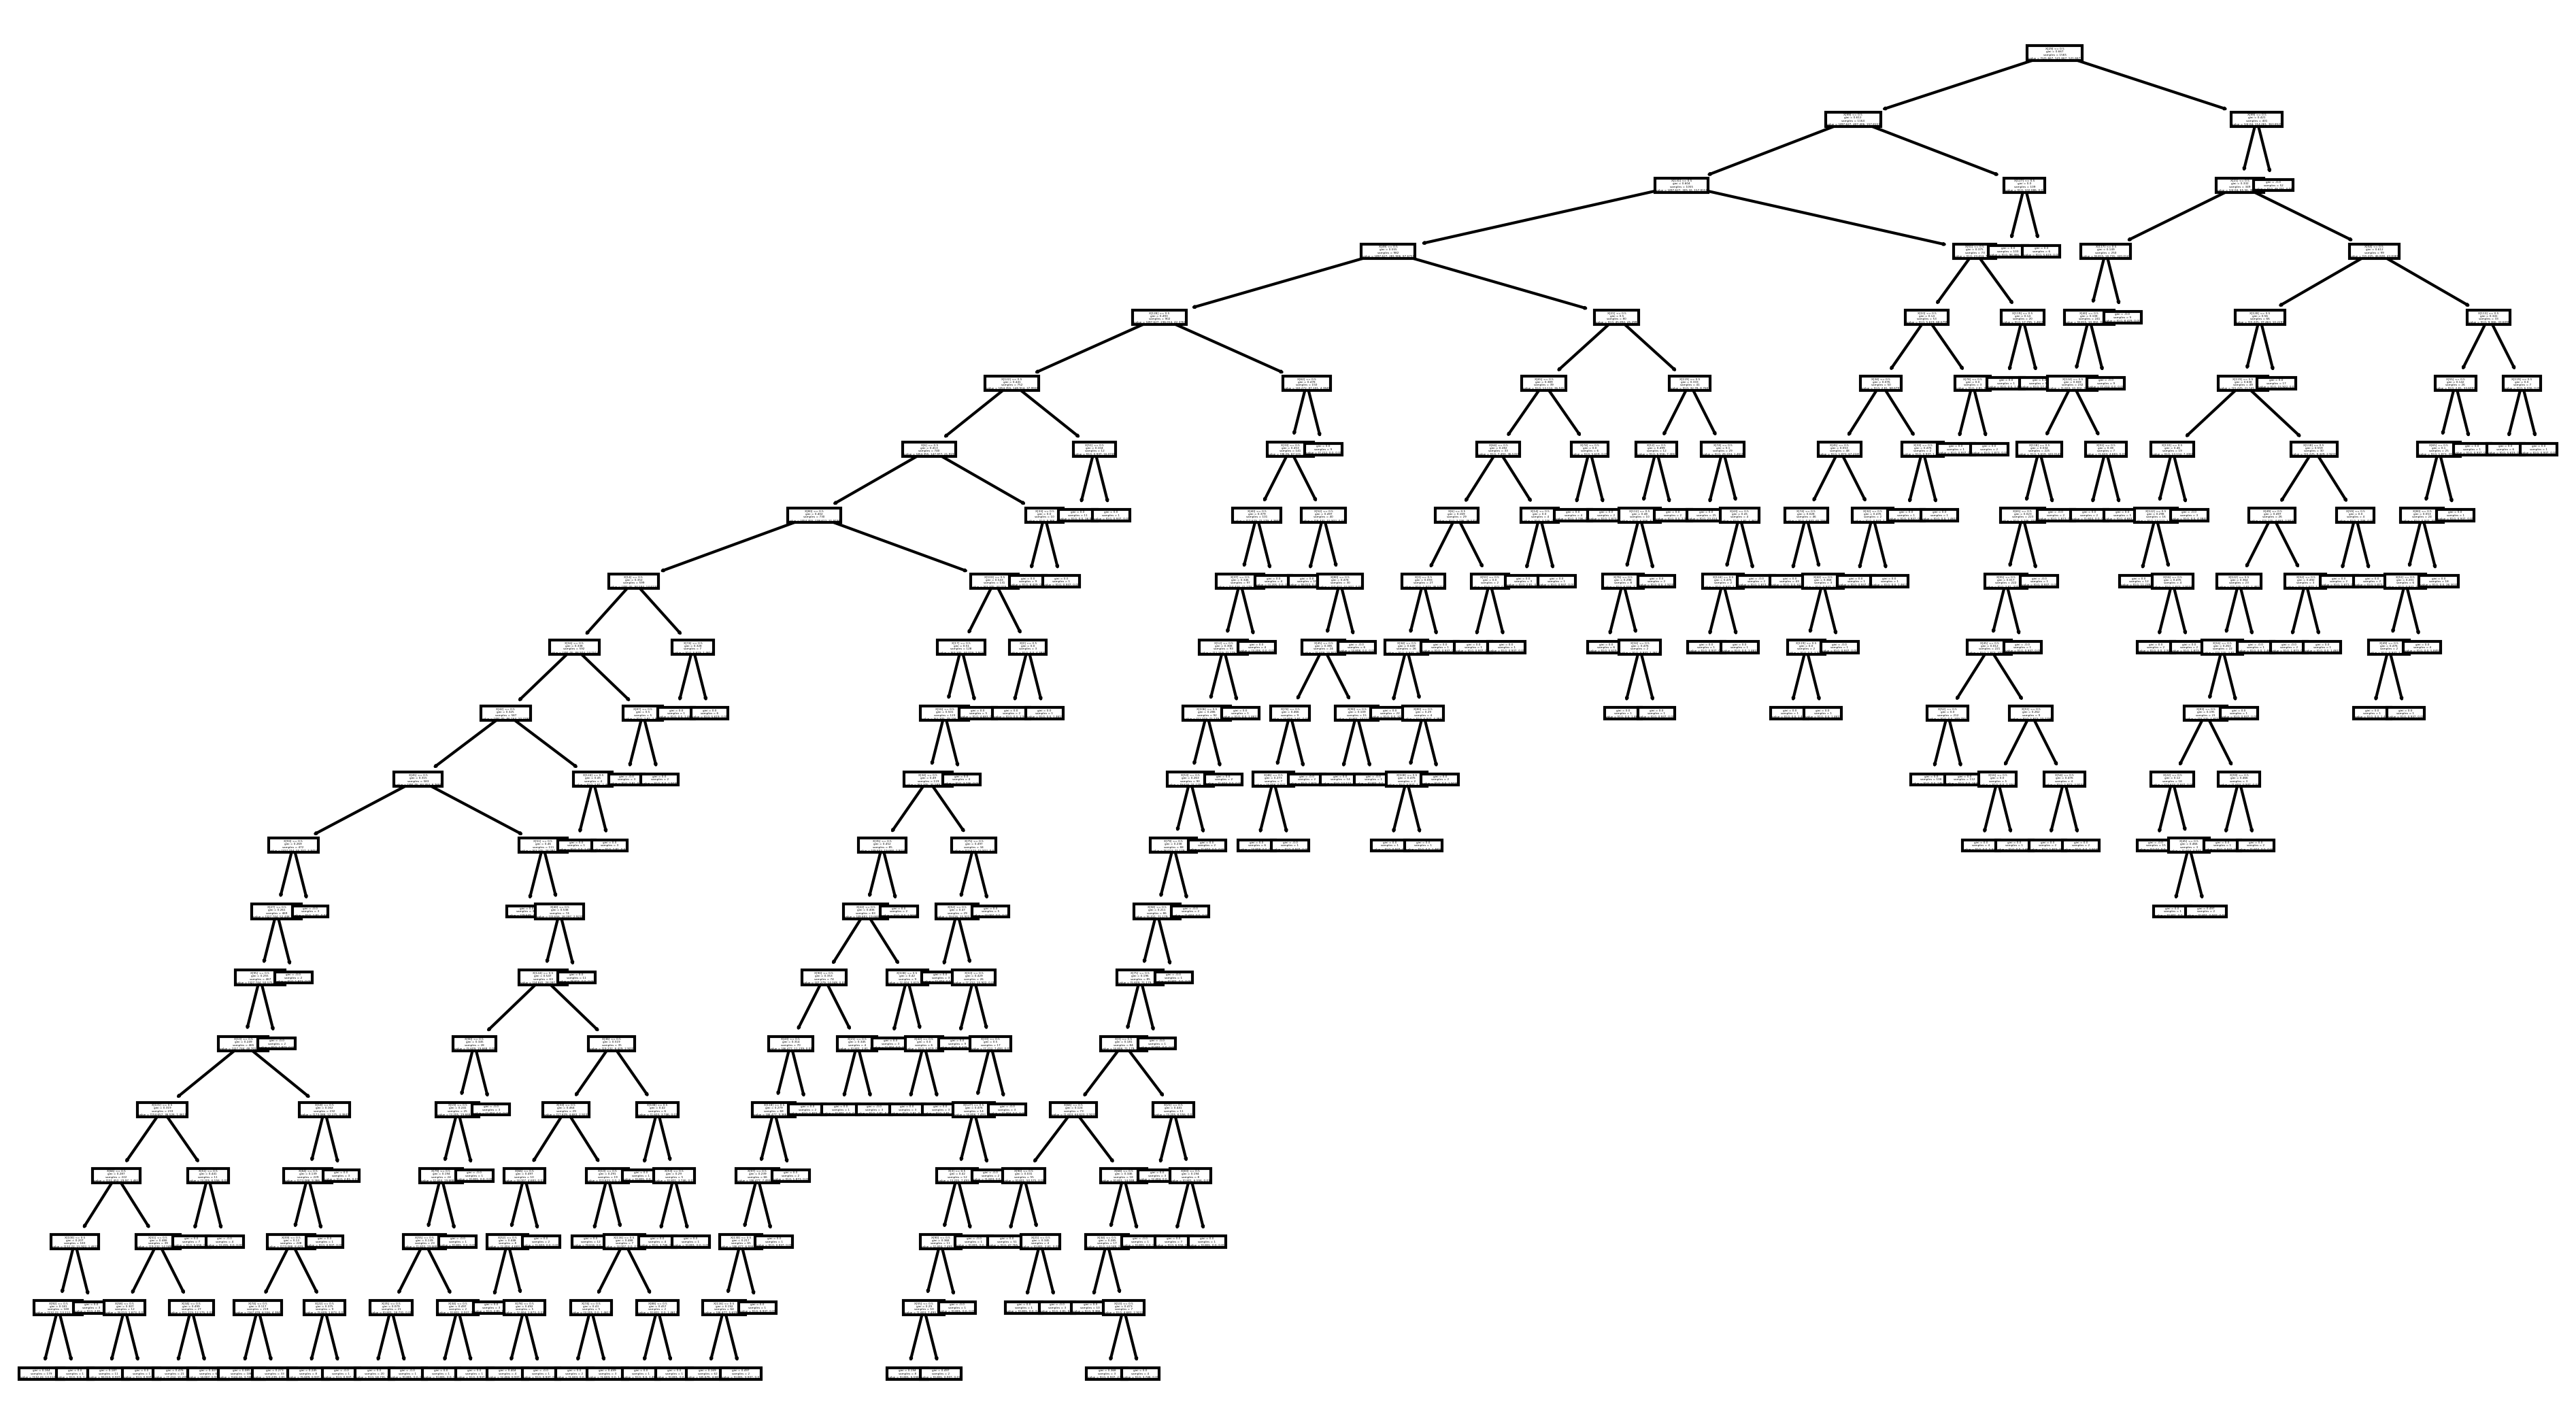

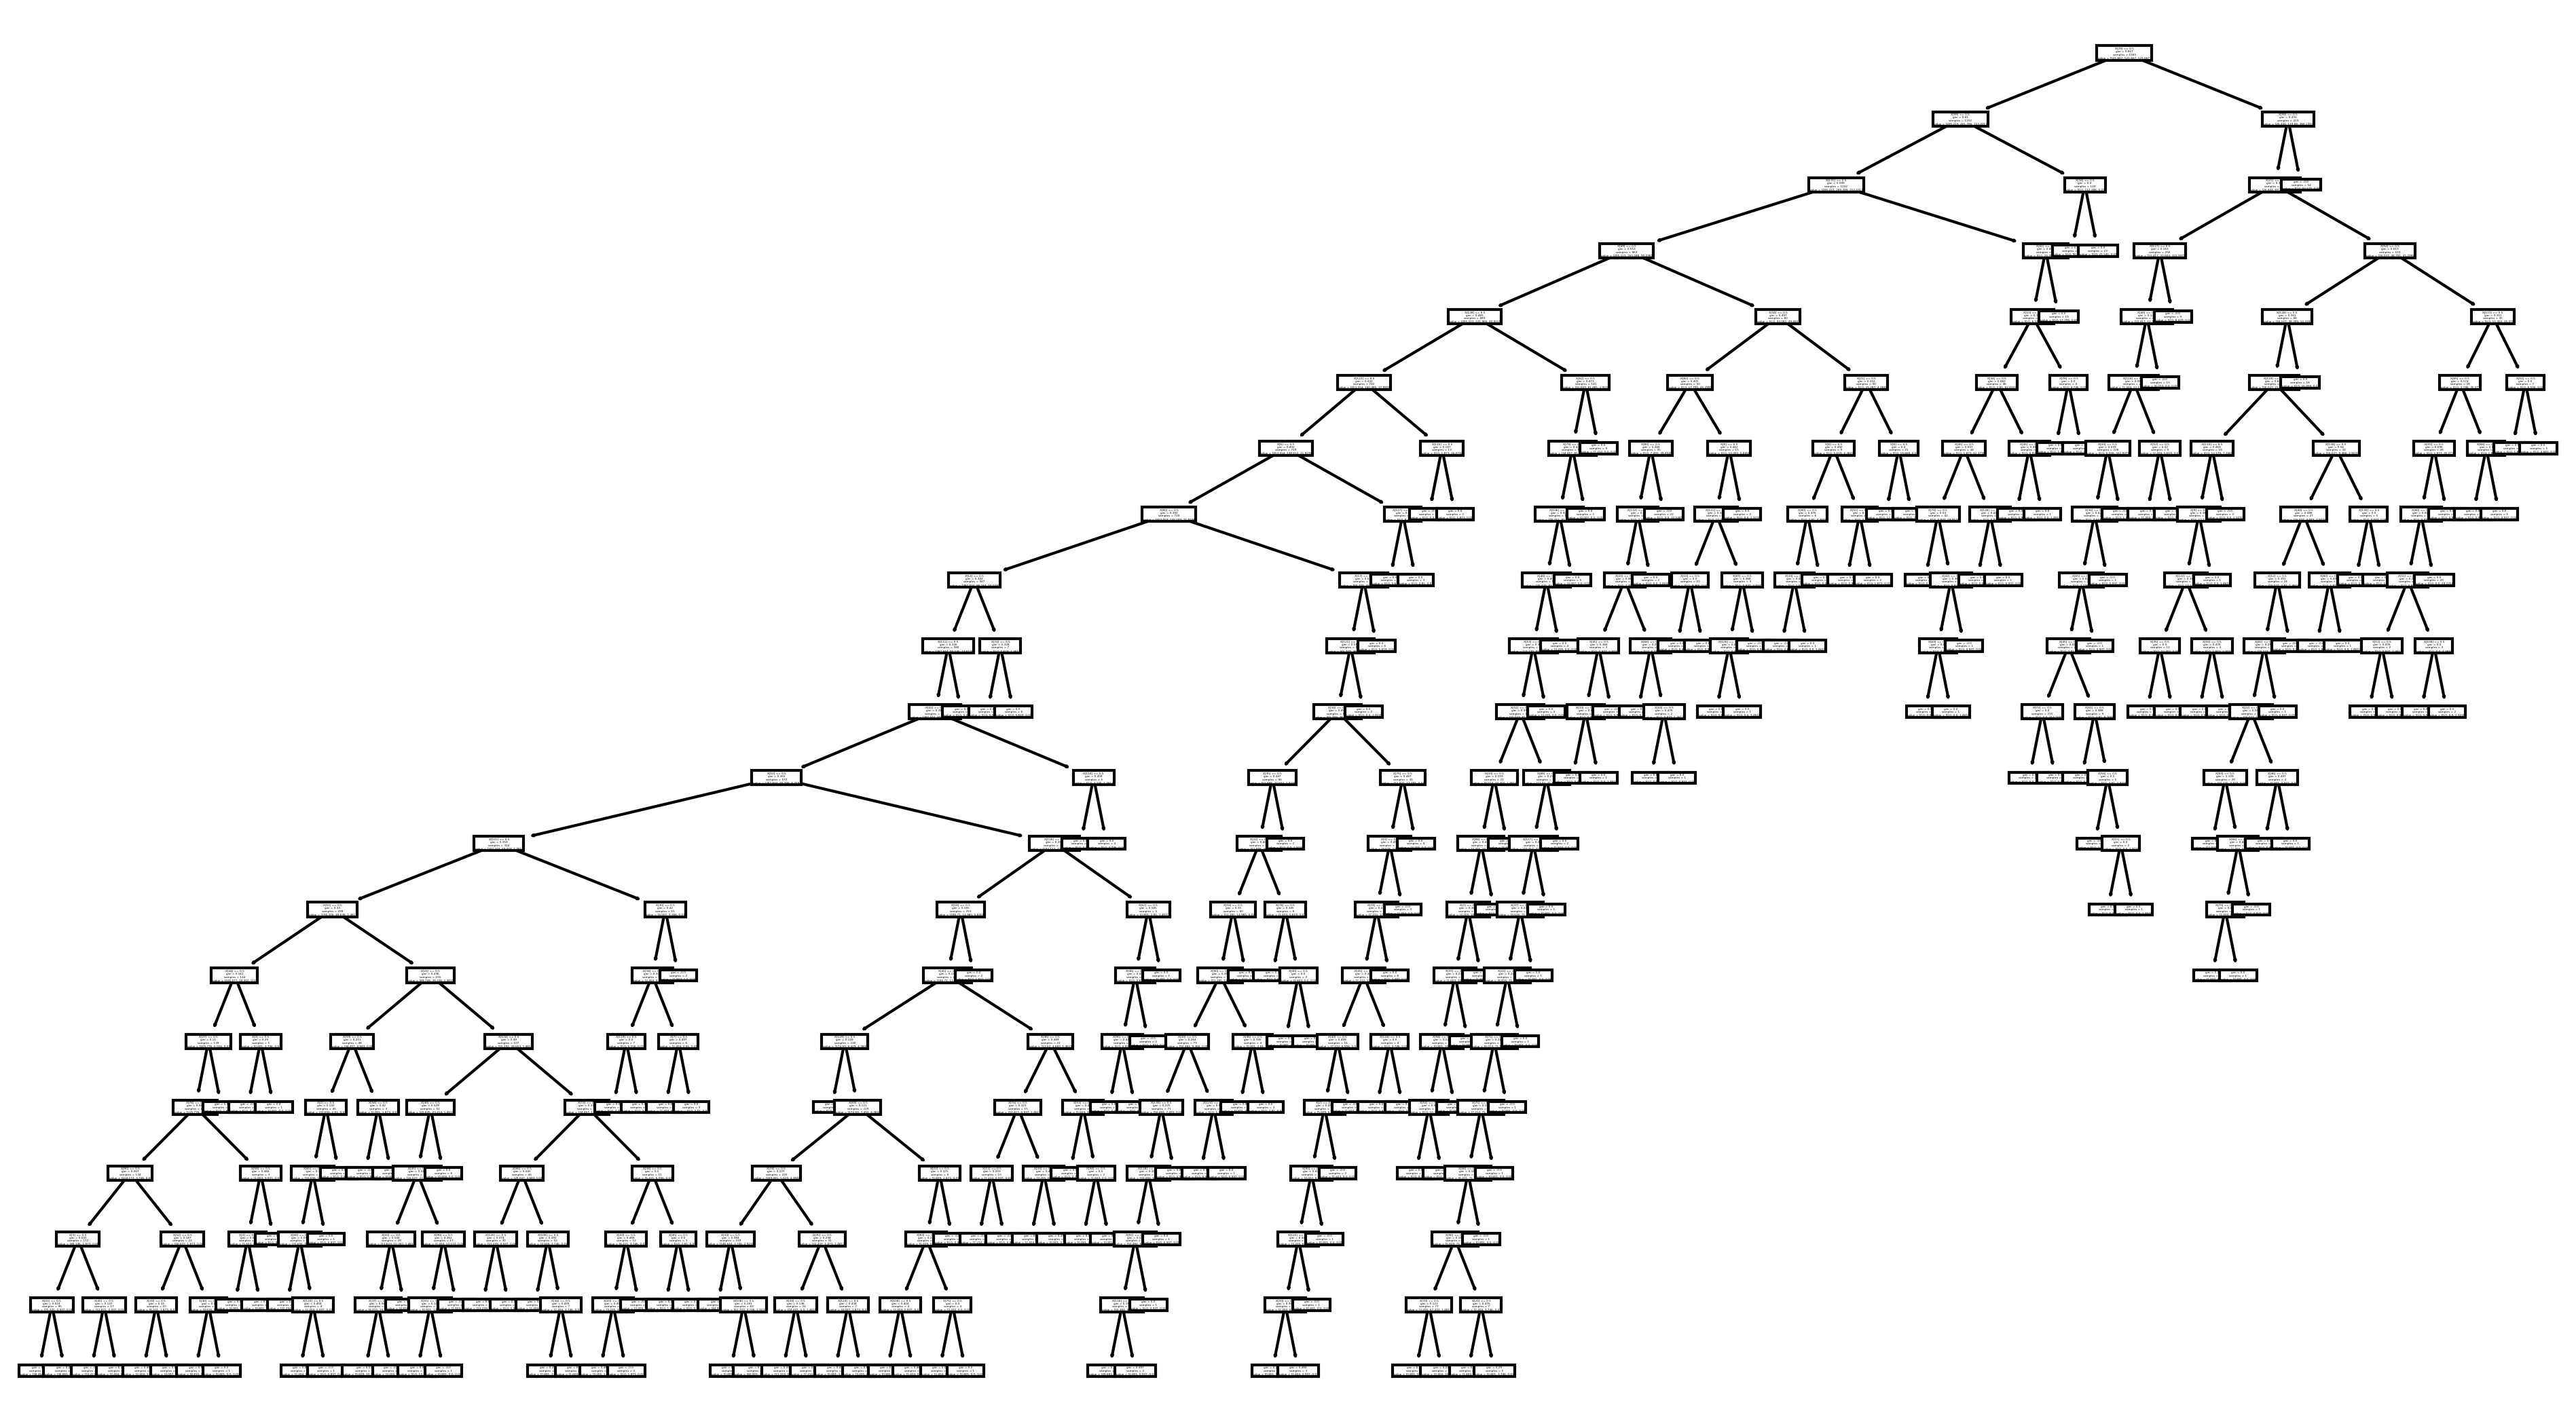

In [23]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(X_trening, y_trening)

fin_conf_mat_dt = np.zeros((len(np.unique(y_trening)),len(np.unique(y_trening))))
for train_index, test_index in indexes:
    classifier = DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_depth=20)
    classifier.fit(X_trening.iloc[train_index,:], y_trening.iloc[train_index])
    plt.figure(figsize=(16,9), dpi=300)
    tree.plot_tree(classifier)
    Y_pred = classifier.predict(X_trening.iloc[test_index,:])
    conf_mat = confusion_matrix(y_trening.iloc[test_index], Y_pred)
    print(conf_mat)
    fin_conf_mat_dt += conf_mat
print('finalna matrica za stablo odluke je: ')
print(fin_conf_mat_dt)
print('procenat pogođenih uzoraka je: ', np.trace(fin_conf_mat_dt)/sum(sum(fin_conf_mat_dt))*100, '%')

c=evaluation_classif_cookies(fin_conf_mat_dt)
p1=evaluation_classif_pastries(fin_conf_mat_dt)
p2=evaluation_classif_pizzas(fin_conf_mat_dt)
print('prosecna tacnost klasifikatora',(c+p1+p2)/3)


In [24]:
dt = DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_depth=20)
dt.fit(X_trening, y_trening)
y_pred=dt.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print('procenat pogođenih uzoraka je: ', np.trace(conf_mat)/sum(sum(conf_mat))*100, '%')

c=evaluation_classif_cookies(conf_mat)
p1=evaluation_classif_pastries(conf_mat)
p2=evaluation_classif_pizzas(conf_mat)

print('Prosečna tačnos klasifikatora je: ',(c+p1+p2)/3)
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))


[[68  4  0]
 [ 5 57  0]
 [ 0  1 38]]
procenat pogođenih uzoraka je:  94.21965317919076 %
Tačnost klasifikatora za klasu Cookies:  0.9479768786127167
precision:  0.9315068493150684
sensitivity/recall:  0.9444444444444444
specificity:  0.9504950495049505
Tačnost klasifikatora za klasu Pastries:  0.9421965317919075
precision:  0.9193548387096774
sensitivity/recall:  0.9193548387096774
specificity:  0.954954954954955
Tačnost klasifikatora za klasu Pizzas:  0.9942196531791907
precision:  1.0
sensitivity/recall:  0.9743589743589743
specificity:  1.0
Prosečna tačnos klasifikatora je:  0.9614643545279383
procenat pogodjenih uzoraka:  0.9421965317919075
preciznost mikro:  0.9421965317919075
preciznost makro:  0.9502872293415819
osetljivost mikro:  0.9421965317919075
osetljivost makro:  0.9460527525043654
f mera mikro:  0.9421965317919075
f mera makro:  0.9480996200684743


In [25]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10,15],'class_weight':(None, 'balanced'), 'n_estimators':[50,100,200]}
rf = RandomForestClassifier()
clf=GridSearchCV(rf, parameters)
clf.fit(X_trening, y_trening)
print(clf.best_score_)
print(clf.best_params_)

0.8716568948954917
{'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}


In [27]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(X_trening, y_trening)

fin_conf_mat_rf = np.zeros((len(np.unique(y_trening)),len(np.unique(y_trening))))
for train_index, test_index in indexes:
    classifier = RandomForestClassifier(class_weight='balanced',criterion='gini', n_estimators=100, max_depth=15)
    classifier.fit(X_trening.iloc[train_index,:], y_trening.iloc[train_index])
    Y_pred = classifier.predict(X_trening.iloc[test_index,:])
    conf_mat = confusion_matrix(y_trening.iloc[test_index], Y_pred)
    print(conf_mat)
    fin_conf_mat_rf += conf_mat
print('finalna matrica za random forest je: ')
print(fin_conf_mat_rf)
print('procenat pogođenih uzoraka je: ', np.trace(fin_conf_mat_rf)/sum(sum(fin_conf_mat_rf))*100, '%')

c=evaluation_classif_cookies(fin_conf_mat_rf)
p1=evaluation_classif_pastries(fin_conf_mat_rf)
p2=evaluation_classif_pizzas(fin_conf_mat_rf)

print('Prosečna tačnos klasifikatora je: ',(c+p1+p2)/3)
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))



[[71  1  1]
 [ 7 55  0]
 [ 1  3 35]]
[[70  3  0]
 [10 52  0]
 [ 0  0 39]]
[[72  1  0]
 [ 5 54  2]
 [ 0  1 39]]
[[71  1  0]
 [12 46  4]
 [ 2  0 38]]
[[68  4  0]
 [11 50  1]
 [ 0  1 39]]
[[70  2  0]
 [ 8 51  3]
 [ 2  1 37]]
[[70  2  0]
 [ 9 52  1]
 [ 1  1 38]]
[[69  3  0]
 [ 9 53  0]
 [ 1  0 39]]
[[68  4  0]
 [ 7 55  0]
 [ 0  1 38]]
[[71  1  0]
 [11 50  1]
 [ 0  2 37]]
finalna matrica za random forest je: 
[[700.  22.   1.]
 [ 89. 518.  12.]
 [  7.  10. 379.]]
procenat pogođenih uzoraka je:  91.88722669735327 %
Tačnost klasifikatora za klasu Cookies:  0.9315304948216341
precision:  0.8793969849246231
sensitivity/recall:  0.9681881051175657
specificity:  0.9054187192118227
Tačnost klasifikatora za klasu Pastries:  0.9234752589182968
precision:  0.9418181818181818
sensitivity/recall:  0.8368336025848142
specificity:  0.9714030384271671
Tačnost klasifikatora za klasu Pizzas:  0.9827387802071347
precision:  0.9668367346938775
sensitivity/recall:  0.9570707070707071
specificity:  0.9903129657

In [28]:
dt = RandomForestClassifier(class_weight='balanced',criterion='gini',n_estimators=200, max_depth=15)
dt.fit(X_trening,y_trening)
y_pred=dt.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print('procenat pogođenih uzoraka je: ', np.trace(conf_mat)/sum(sum(conf_mat))*100, '%')

co=evaluation_classif_cookies(conf_mat)
pe=evaluation_classif_pastries(conf_mat)
pi=evaluation_classif_pizzas(conf_mat)

print('Prosečna tačnos klasifikatora je: ',(co+pe+pi)/3)
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))


[[72  0  0]
 [ 3 59  0]
 [ 0  1 38]]
procenat pogođenih uzoraka je:  97.6878612716763 %
Tačnost klasifikatora za klasu Cookies:  0.9826589595375722
precision:  0.96
sensitivity/recall:  1.0
specificity:  0.9702970297029703
Tačnost klasifikatora za klasu Pastries:  0.976878612716763
precision:  0.9833333333333333
sensitivity/recall:  0.9516129032258065
specificity:  0.990990990990991
Tačnost klasifikatora za klasu Pizzas:  0.9942196531791907
precision:  1.0
sensitivity/recall:  0.9743589743589743
specificity:  1.0
Prosečna tačnos klasifikatora je:  0.9845857418111752
procenat pogodjenih uzoraka:  0.976878612716763
preciznost mikro:  0.976878612716763
preciznost makro:  0.9811111111111112
osetljivost mikro:  0.976878612716763
osetljivost makro:  0.975323959194927
f mera mikro:  0.976878612716763
f mera makro:  0.9779393128339263
